In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statistics import stdev
import statistics 
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import sem
import scipy
import math
import warnings
warnings.filterwarnings('ignore')

print("Library Imported.")

Library Imported.


#### Read data

In [2]:
coeff = pd.read_csv("coeff.csv")
auc= pd.read_csv('auc.csv')
act_173=pd.read_csv('173_clean.csv')

# Prepare data
### Prepare AUC Data

In [3]:
model_list_auc = auc.columns.tolist()
model_list_auc = model_list_auc[2:]
model_list_auc

['response_max_spire_auto_luxury_AUC',
 'response_max_spire_fashion_luxuryjewelry_AUC',
 'response_max_spire_fashion_luxurymale_AUC',
 'response_max_spire_fashion_luxuryretail_AUC',
 'response_max_spire_fashion_luxurywatch_AUC']

### Prepare coeff data

In [4]:
model_list_coe = coeff.columns.tolist()
model_list_coe = model_list_coe[2:]
model_list_coe

['response_max_spire_auto_luxury_model',
 'response_max_spire_fashion_luxuryjewelry_model',
 'response_max_spire_fashion_luxurymale_model',
 'response_max_spire_fashion_luxuryretail_model',
 'response_max_spire_fashion_luxurywatch_model']

In [5]:
def extract_one_model(model_name):
    '''extract coefficients of one model from the whole dataset''' 
    model = pd.pivot_table(coeff,values=[model_name],index=['Date'],columns=['variable'])
    flattened_model = pd.DataFrame(model.to_records())
    flattened_model.columns = flattened_model.columns.map(lambda x:x[len(model_name)+6:-2])
    flattened_model = flattened_model.rename(columns={'':'Date'})
    return flattened_model

In [6]:
model_1 = extract_one_model(model_list_coe[0])
model_2 = extract_one_model(model_list_coe[1])
model_3 = extract_one_model(model_list_coe[2])
model_4 = extract_one_model(model_list_coe[3])
model_5 = extract_one_model(model_list_coe[4])

# 2.1 Variable coeffs and auc

In [7]:
auc = auc.sort_values(by="Date")
best_model = auc[auc.model == 'best model on full dataset']

We choose "best model on full dataset" as the representative since it mostly provides the highest auc.

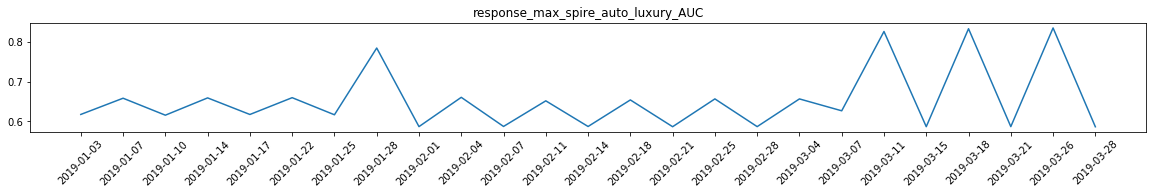

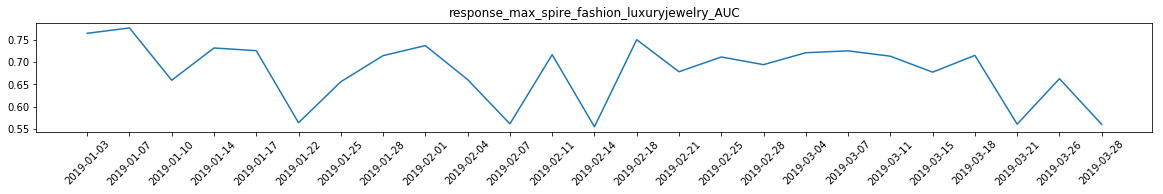

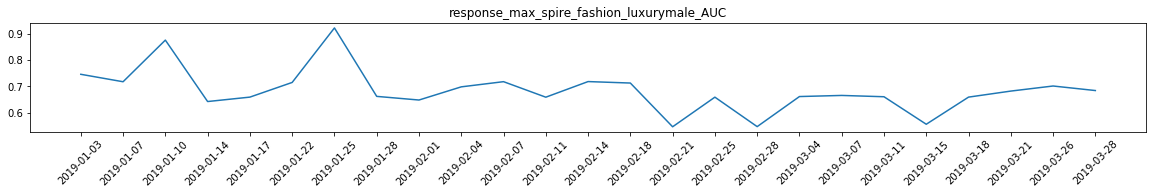

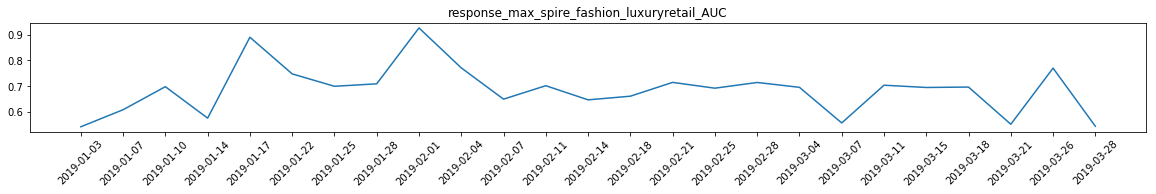

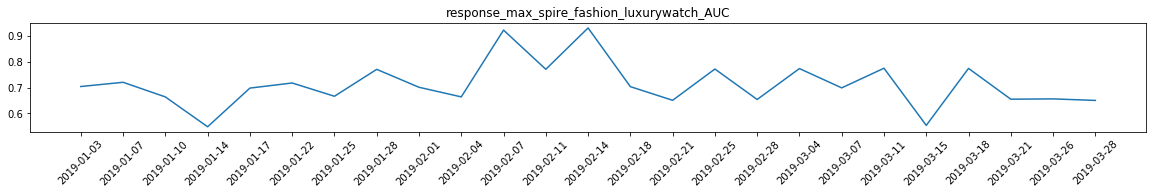

In [8]:
# auc plot of 5 models
for i in range(5):
    plt.figure(figsize=(20, 2))
    plt.plot(best_model.iloc[:,0],best_model[model_list_auc[i]])
    plt.xticks(rotation=45)
    plt.title(model_list_auc[i]) 

1. According to Michael C Seto, the Forensic research director and Associate Professor in University of Ottawa, generally speaking, auc values of 0.7 and higher would be considered strong effects in prediction of future behavior. 
2. From the graph we can see that, 0.7/0.75/0.8 could be a proper threshold.

Based on these two points, we will use 0.7 as the threshold.

### Select coefficients on days that have good auc

In [9]:
# select good auc 
model_1_good_auc = best_model[(best_model[model_list_auc[0]] >= 0.7)]
model_2_good_auc = best_model[(best_model[model_list_auc[1]] >= 0.7)]
model_3_good_auc = best_model[(best_model[model_list_auc[2]] >= 0.7)]
model_4_good_auc = best_model[(best_model[model_list_auc[3]] >= 0.7)]
model_5_good_auc = best_model[(best_model[model_list_auc[4]] >= 0.7)]

In [10]:
variable_list = model_1.columns.tolist()
variable_list = variable_list[1:]

# prepare coeff of good auc dates
model_1_good_auc_coeff = pd.DataFrame(model_1)
model_2_good_auc_coeff = pd.DataFrame(model_2)
model_3_good_auc_coeff = pd.DataFrame(model_3)
model_4_good_auc_coeff = pd.DataFrame(model_4)
model_5_good_auc_coeff = pd.DataFrame(model_5)

model_1 = extract_one_model(model_list_coe[0])
model_2 = extract_one_model(model_list_coe[1])
model_3 = extract_one_model(model_list_coe[2])
model_4 = extract_one_model(model_list_coe[3])
model_5 = extract_one_model(model_list_coe[4])

model_1_good_auc_coeff.loc[~model_1_good_auc_coeff.Date.isin(model_1_good_auc.Date),variable_list] = -5
model_2_good_auc_coeff.loc[~model_2_good_auc_coeff.Date.isin(model_2_good_auc.Date),variable_list] = -5
model_3_good_auc_coeff.loc[~model_3_good_auc_coeff.Date.isin(model_3_good_auc.Date),variable_list] = -5
model_4_good_auc_coeff.loc[~model_4_good_auc_coeff.Date.isin(model_4_good_auc.Date),variable_list] = -5
model_5_good_auc_coeff.loc[~model_5_good_auc_coeff.Date.isin(model_5_good_auc.Date),variable_list] = -5

#### Model 1

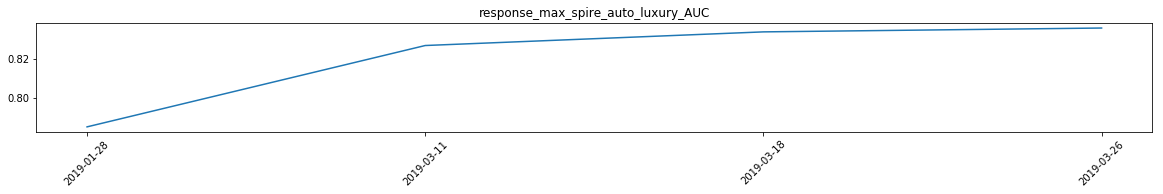

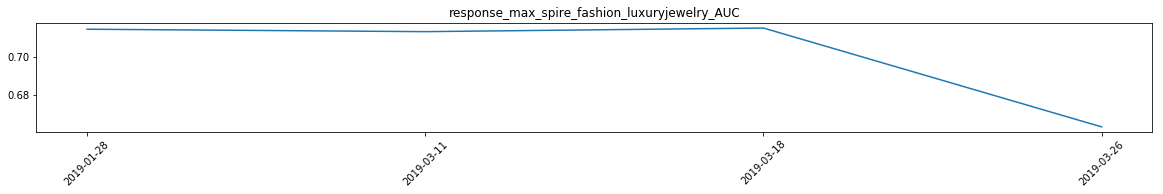

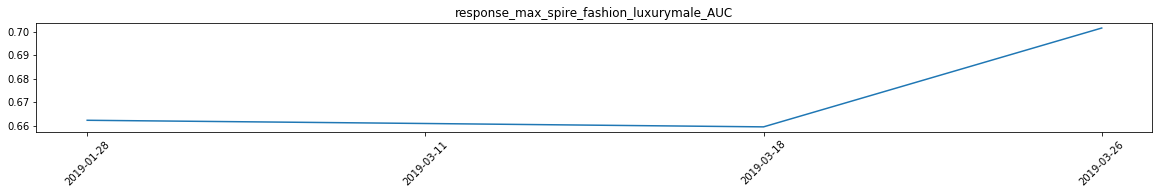

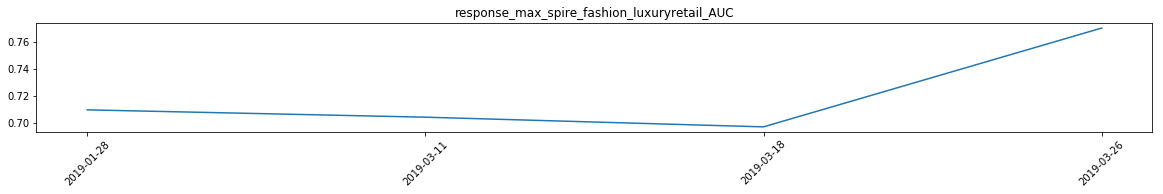

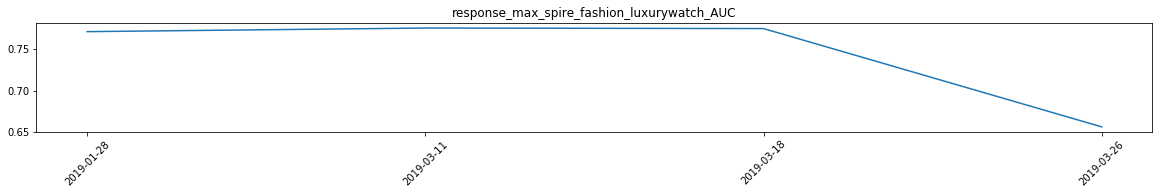

In [11]:
for i in range(5):
    plt.figure(figsize=(20, 2))
    plt.plot(model_1_good_auc.iloc[:,0],model_1_good_auc[model_list_auc[i]])
    plt.xticks(rotation=45)
    plt.title(model_list_auc[i]) 

for model1, meaningful auc is on 2019-01-28, 2019-03-11, 2019-03-18, 2019-03-26

In [12]:
model_1_good_auc_coeff_time = model_1_good_auc_coeff.loc[model_1_good_auc_coeff['Date'].isin(['2019-01-28','2019-03-11','2019-03-18','2019-03-26'])]
model_1_good_auc_coeff_time

Date  brand_adnetwork  brand_adnetwork_bin  brand_allure  \
7   2019-01-28              0.0             0.002547     -0.000012   
19  2019-03-11              0.0             0.145312      0.000000   
21  2019-03-18              0.0             0.000000      0.000000   
23  2019-03-26              0.0             0.145583      0.000000   

    brand_allure_bin  brand_architecturaldigest  \
7            0.00000                        0.0   
19           0.00000                        0.0   
21           0.00000                        0.0   
23          -0.00095                        0.0   

    brand_architecturaldigest_bin  brand_arstechnica  brand_arstechnica_bin  \
7                        0.088327          -0.000792               0.336358   
19                       0.030663          -0.000847               0.446394   
21                       0.000000           0.000000               0.005356   
23                       0.000010          -0.000617               0.403576   

    brand_bonappetit  ...  zip_Workers16PlusPctOutsideStateofResidence  \
7           0.002612  ...                                          0.0   
19          0.001414  ...                                          0.0   
21          0.000000  ...                                          0.0   
23          0.000006  ...                                          0.0   

    zip_Workers16PlusPctPublicTransportationBusortrolleybus  \
7                                           -0.000829         
19                                          -0.000130         
21                                           0.000000         
23                                          -0.000083         

    zip_Workers16PlusPctPublicTransportationExcludingTaxicab  \
7                                           -0.000200          
19                                          -0.001200          
21                                           0.000000          
23                                          -0.000391          

    zip_Workers16PlusPctPublicTransportationFerryboat  \
7                                                 0.0   
19                                                0.0   
21                                                0.0   
23                                                0.0   

    zip_Workers16PlusPctPublicTransportationStreetcarTrolleyCar  \
7                                                 0.0             
19                                                0.0             
21                                                0.0             
23                                                0.0             

    zip_Workers16PlusPctPublicTransportationSubwayElevated  \
7                                           -0.000337        
19                                          -0.000793        
21                                           0.000000        
23                                          -0.000305        

    zip_Workers16PlusPctPublicTransportationUsingRailways  \
7                                            0.002047       
19                                           0.006373       
21                                           0.000000       
23                                           0.001710       

    zip_Workers16PlusPctTaxicab  zip_Workers16PlusPctWalked  \
7                     -0.004491                   -0.000148   
19                    -0.007071                   -0.000062   
21                     0.000000                    0.000000   
23                    -0.003364                   -0.000095   

    zip_Workers16PlusPctWorkedAtHome  
7                          -0.000044  
19                         -0.000201  
21                          0.000000  
23                         -0.000085  

[4 rows x 1109 columns]

#### Model 2

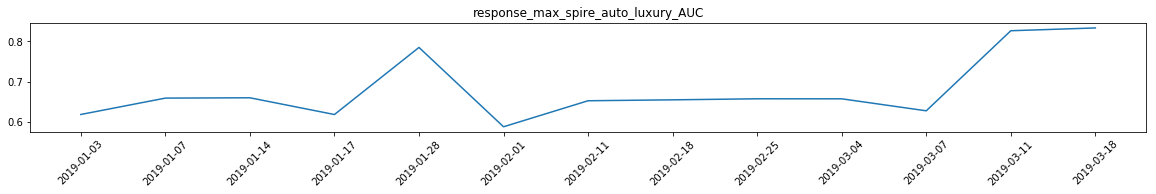

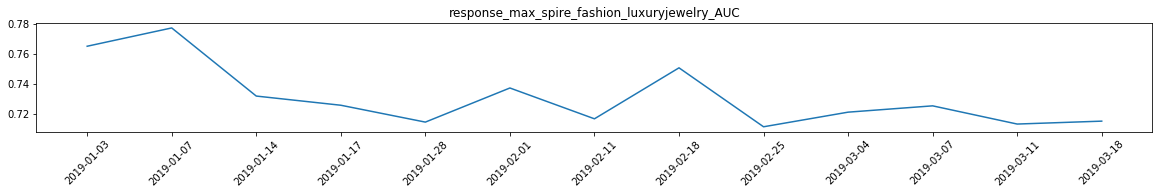

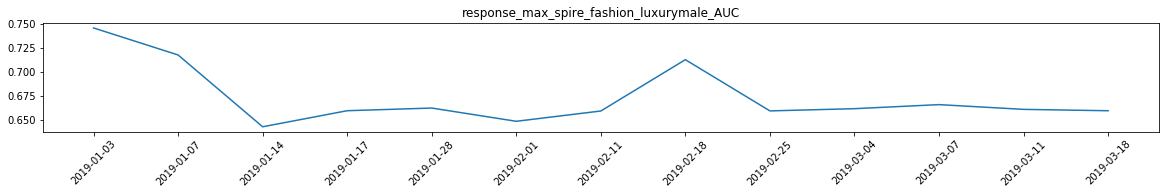

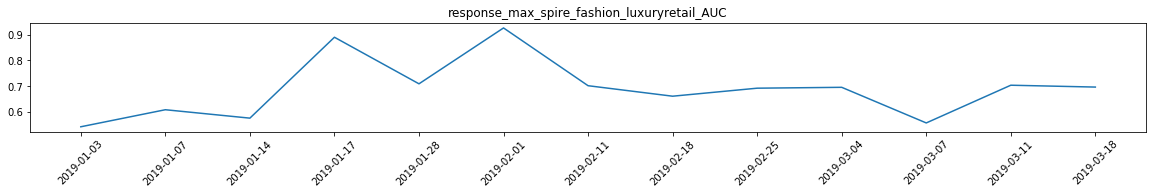

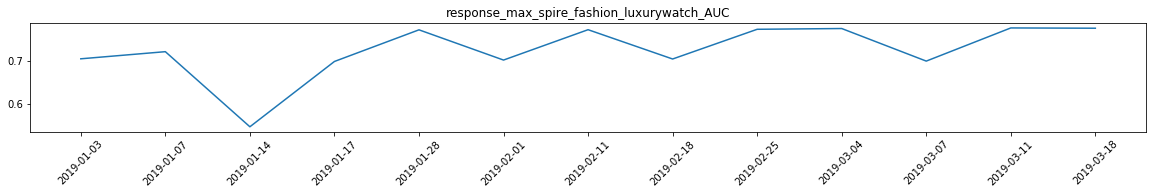

In [13]:
for i in range(5):
    plt.figure(figsize=(20, 2))
    plt.plot(model_2_good_auc.iloc[:,0],model_2_good_auc[model_list_auc[i]])
    plt.xticks(rotation=45)
    plt.title(model_list_auc[i]) 

for model2, meaningful auc is on 2019-01-03, 2019-01-07, 2019-01-14, 2019-01-17, 2019-01-28, 2019-02-01, 2019-02-11, 2019-02-18, 2019-02-25, 2019-03-04, 2019-03-07, 2019-03-11, 2019-03-18.

In [14]:
model_2_good_auc_coeff_time = model_2_good_auc_coeff.loc[model_2_good_auc_coeff['Date'].isin(['2019-01-03','2019-01-07','2019-01-14','2019-01-17','2019-01-28','2019-02-01','2019-02-11','2019-02-18','2019-02-25','2019-03-04','2019-03-07','2019-03-11','2019-03-18'])]
model_2_good_auc_coeff_time

Date  brand_adnetwork  brand_adnetwork_bin  brand_allure  \
0   2019-01-03         0.000000             0.313187      0.000022   
1   2019-01-07         0.000207             0.293626      0.000955   
3   2019-01-14         0.000000             0.000000      0.000000   
4   2019-01-17        -0.000131             0.069842      0.000000   
7   2019-01-28         0.000041             0.527609      0.000731   
8   2019-02-01        -0.000085             0.157528     -0.000046   
11  2019-02-11         0.000176             0.499208      0.001496   
13  2019-02-18         0.000357             0.537935      0.001240   
15  2019-02-25         0.000175             0.522371      0.000820   
17  2019-03-04         0.000251             0.542657      0.000668   
18  2019-03-07         0.000000            -0.012493     -0.000426   
19  2019-03-11         0.000000             0.510084      0.000081   
21  2019-03-18         0.000174             0.540484      0.000097   

    brand_allure_bin  brand_architecturaldigest  \
0           0.955675                   0.001176   
1           0.849614                   0.000578   
3           0.000000                   0.000000   
4           0.093391                   0.000000   
7           0.661183                   0.000000   
8           0.176283                   0.000044   
11          0.510377                   0.000228   
13          0.576352                  -0.000017   
15          0.568972                   0.000000   
17          0.508069                   0.000000   
18          0.005628                  -0.000037   
19          0.583174                   0.000000   
21          0.517887                   0.000000   

    brand_architecturaldigest_bin  brand_arstechnica  brand_arstechnica_bin  \
0                        0.588950           0.000000              -0.249989   
1                        0.596326          -0.000028              -0.259980   
3                        0.000000           0.000000               0.000000   
4                        0.113794           0.000074              -0.015192   
7                        0.238891          -0.000128              -0.219526   
8                        0.184936           0.000037              -0.009785   
11                       0.254685          -0.000076              -0.184351   
13                       0.299850           0.000183              -0.223398   
15                       0.260335          -0.000018              -0.205072   
17                       0.225045          -0.000036              -0.164026   
18                      -0.000181          -0.000161               0.269681   
19                       0.249619           0.000000              -0.186549   
21                       0.334575           0.000000              -0.183726   

    brand_bonappetit  ...  zip_Workers16PlusPctOutsideStateofResidence  \
0           0.000087  ...                                     0.000007   
1           0.000294  ...                                     0.000157   
3           0.000000  ...                                     0.000000   
4           0.000630  ...                                    -0.000039   
7           0.000000  ...                                     0.000599   
8           0.000268  ...                                    -0.000108   
11          0.003396  ...                                     0.000311   
13          0.001384  ...                                     0.000434   
15          0.001511  ...                                     0.000119   
17          0.002798  ...                                     0.000016   
18          0.000000  ...                                     0.000000   
19          0.000000  ...                                     0.000070   
21          0.000998  ...                                     0.000036   

    zip_Workers16PlusPctPublicTransportationBusortrolleybus  \
0                                           -0.000037         
1                                           

#### Model 3

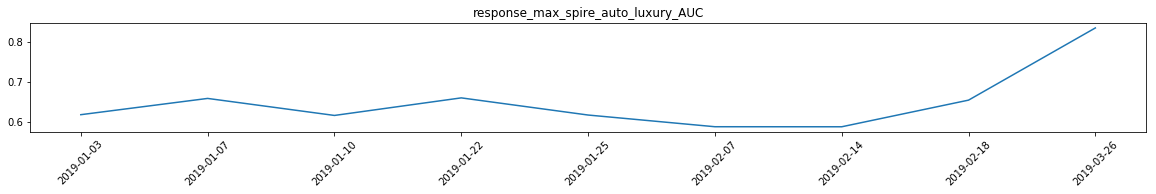

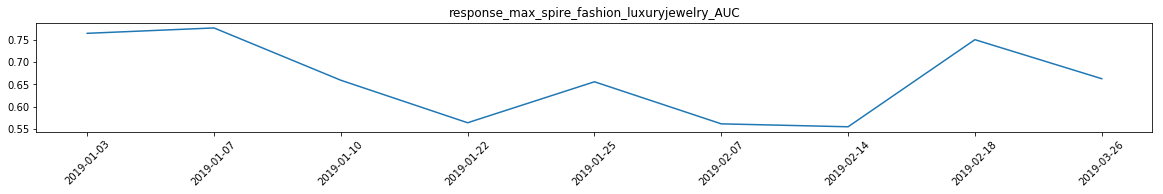

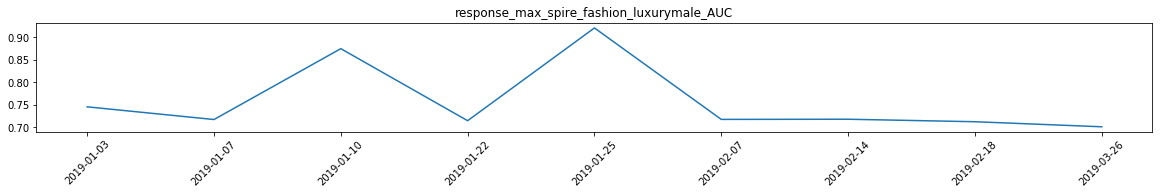

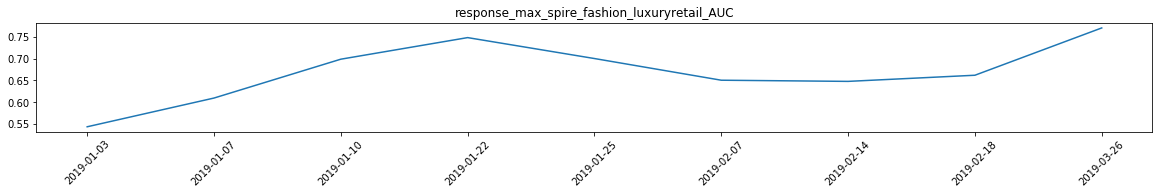

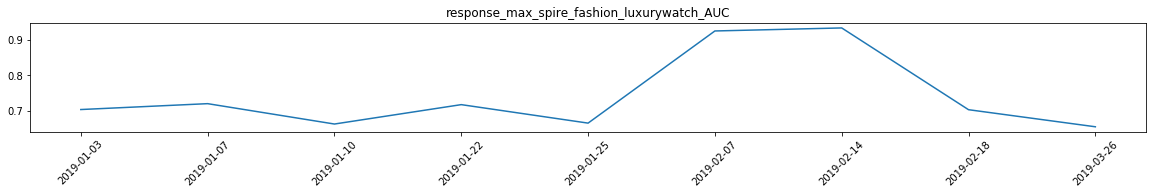

In [15]:
for i in range(5):
    plt.figure(figsize=(20, 2))
    plt.plot(model_3_good_auc.iloc[:,0],model_3_good_auc[model_list_auc[i]])
    plt.xticks(rotation=45)
    plt.title(model_list_auc[i]) 

for model3, meaningful auc is on 2019-01-03, 2019-01-07, 2019-01-10, 2019-01-22, 2019-01-25, 2019-02-07, 2019-02-14, 2019-02-18, 2019-02-26.

In [16]:
model_3_good_auc_coeff_time = model_3_good_auc_coeff.loc[model_3_good_auc_coeff['Date'].isin(['2019-01-03','2019-01-07','2019-01-10','2019-01-22','2019-01-25','2019-02-07','2019-02-14','2019-02-18','2019-02-26'])]
model_3_good_auc_coeff_time

Date  brand_adnetwork  brand_adnetwork_bin  brand_allure  \
0   2019-01-03         0.000032             0.391567     -0.001026   
1   2019-01-07         0.000065             0.361820      0.000830   
2   2019-01-10         0.000000             0.433047      0.001398   
5   2019-01-22         0.000000            -0.000677      0.000000   
6   2019-01-25         0.000000             0.501871      0.000000   
10  2019-02-07        -0.000474             0.084540     -0.000130   
12  2019-02-14         0.000029             0.077711     -0.000021   
13  2019-02-18         0.000015             0.518732      0.000354   

    brand_allure_bin  brand_architecturaldigest  \
0           0.707193                        0.0   
1           0.883851                        0.0   
2           0.337912                        0.0   
5           0.010933                        0.0   
6           0.000183                        0.0   
10          0.123759                        0.0   
12          0.104408                        0.0   
13          0.549368                        0.0   

    brand_architecturaldigest_bin  brand_arstechnica  brand_arstechnica_bin  \
0                        0.401499           0.000000              -0.237513   
1                        0.527273           0.000087              -0.205953   
2                        0.000000           0.000000              -0.288851   
5                        0.000000           0.000000               0.052928   
6                        0.000000           0.000000              -0.070745   
10                       0.239475           0.000044              -0.016523   
12                       0.133717           0.000014              -0.016439   
13                       0.278995           0.000000              -0.194247   

    brand_bonappetit  ...  zip_Workers16PlusPctOutsideStateofResidence  \
0           0.001090  ...                                     0.000811   
1           0.000403  ...                                     0.000091   
2           0.000288  ...                                     0.000045   
5           0.000042  ...                                     0.000000   
6           0.000000  ...                                     0.000000   
10          0.001536  ...                                    -0.000080   
12          0.000395  ...                                    -0.000040   
13          0.000000  ...                                     0.000157   

    zip_Workers16PlusPctPublicTransportationBusortrolleybus  \
0                                            0.005825         
1                                            0.000148         
2                                            0.000052         
5                                            0.001463         
6                                            0.000000         
10                                           0.000194         
12                                           0.000000         
13                                           0.001489         

    zip_Workers16PlusPctPublicTransportationExcludingTaxicab  \
0                                            0.001017          
1                                           -0.000130          
2                                            0.000015          
5                                            0.000210          
6                                            0.000000          
10                                           0.001026          
12                                           0.000958          
13                                           0.000760          

    zip_Workers16PlusPctPublicTransportationFerryboat  \
0                                           -0.008054   
1                                            0.000425   
2                                            0.000441   
5                                           -0.016546   
6                                            0.000000   
10                                          -0.000357

There is no coeff data on 2019-02-26.
#### Model 4

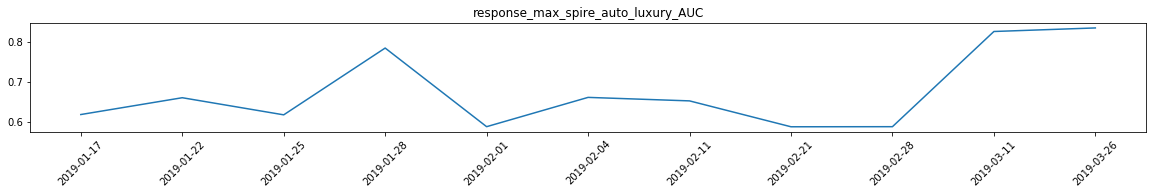

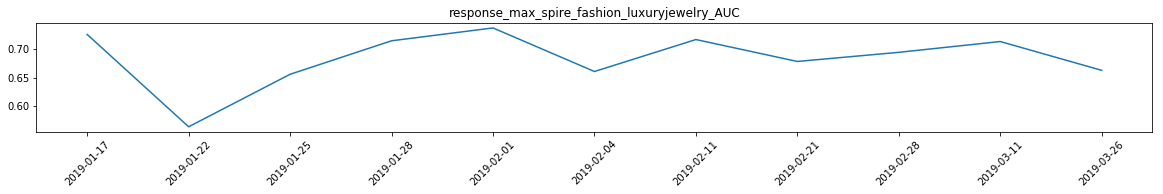

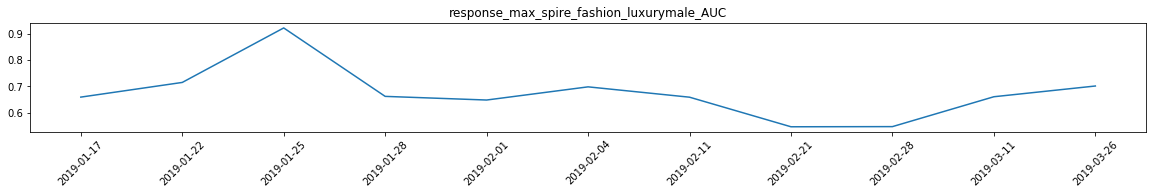

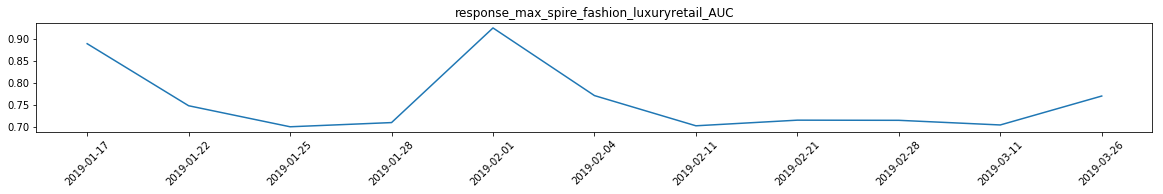

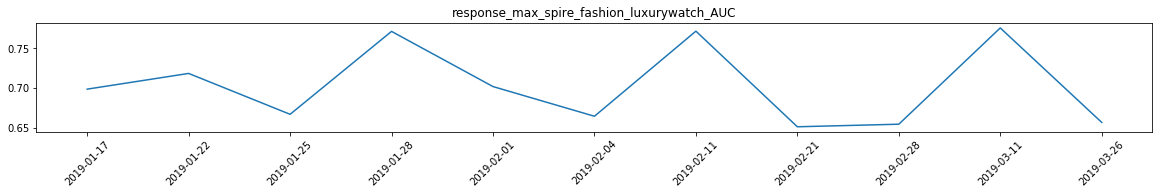

In [17]:
for i in range(5):
    plt.figure(figsize=(20, 2))
    plt.plot(model_4_good_auc.iloc[:,0],model_4_good_auc[model_list_auc[i]])
    plt.xticks(rotation=45)
    plt.title(model_list_auc[i]) 

for model4, meaningful auc is on 2019-01-17, 2019-01-22, 2019-01-25, 2019-01-28, 2019-02-01, 2019-02-04, 2019-02-11, 2019-02-21, 2019-02-28, 2019-03-11, 2019-03-26.

In [18]:
model_4_good_auc_coeff_time = model_4_good_auc_coeff.loc[model_4_good_auc_coeff['Date'].isin(['2019-01-17','2019-01-22','2019-01-25','2019-01-28','2019-02-01','2019-02-04','2019-02-11','2019-02-21','2019-02-28','2019-03-11','2019-03-26'])]
model_4_good_auc_coeff_time

Date  brand_adnetwork  brand_adnetwork_bin  brand_allure  \
4   2019-01-17     0.000000e+00             0.409073      0.001868   
5   2019-01-22    -5.714726e-05             0.564427      0.000346   
6   2019-01-25     1.321066e-04             0.158747      0.000000   
7   2019-01-28     0.000000e+00             0.088094      0.001119   
8   2019-02-01     0.000000e+00             0.163290      0.000000   
9   2019-02-04     4.650682e-04             0.293681      0.000976   
11  2019-02-11     0.000000e+00             0.089005      0.000308   
14  2019-02-21    -4.218713e-04             0.108900     -0.000019   
16  2019-02-28     4.500227e-07             0.082491      0.000000   
19  2019-03-11     0.000000e+00             0.170850      0.000048   
23  2019-03-26     4.970734e-04             0.265194      0.001734   

    brand_allure_bin  brand_architecturaldigest  \
4           0.226533                   0.000000   
5           0.564476                  -0.000084   
6           0.834834                   0.000183   
7           0.527892                   0.000000   
8           0.000007                   0.000000   
9           0.811011                   0.000828   
11          0.558263                   0.000000   
14          0.162406                   0.000000   
16          0.113179                  -0.000006   
19          0.491857                   0.000000   
23          0.694857                   0.001134   

    brand_architecturaldigest_bin  brand_arstechnica  brand_arstechnica_bin  \
4                        0.002193           0.000000              -0.170033   
5                        0.437610           0.000128              -0.232654   
6                        0.496749          -0.000025              -0.073715   
7                        0.481868           0.000000              -0.006494   
8                        0.000000           0.000000               0.000000   
9                        0.593840          -0.000012              -0.256703   
11                       0.426714           0.000000              -0.013314   
14                       0.201144           0.000086              -0.037269   
16                       0.124177           0.000027              -0.028776   
19                       0.411471           0.000000               0.000000   
23                       0.521438          -0.000044              -0.278076   

    brand_bonappetit  ...  zip_Workers16PlusPctOutsideStateofResidence  \
4           0.000156  ...                                     0.000042   
5           0.000617  ...                                     0.000363   
6           0.000101  ...                                    -0.000085   
7           0.000584  ...                                     0.000000   
8           0.000000  ...                                     0.000000   
9           0.000833  ...                                     0.000059   
11          0.002353  ...                                     0.000002   
14          0.001351  ...                                    -0.000017   
16          0.001238  ...                                    -0.000044   
19          0.000612  ...                                     0.000000   
23          0.000663  ...                                     0.000062   

    zip_Workers16PlusPctPublicTransportationBusortrolleybus  \
4                                       -4.381952e-07         
5                                        4.917277e-05         
6                                        2.127985e-04         
7                                        1.484906e-03         
8                                        0.000000e+00         
9                                        3.367919e-03         
11                                       1.090250e-03         
14                                       6.330368e-05         
16                                       6.781193e-05         
19                                       4.539897e-04         
23                       

#### Model 5

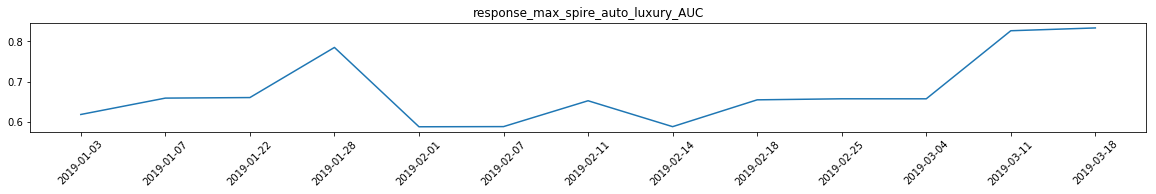

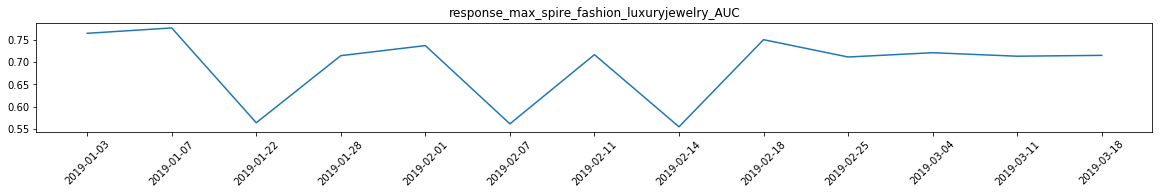

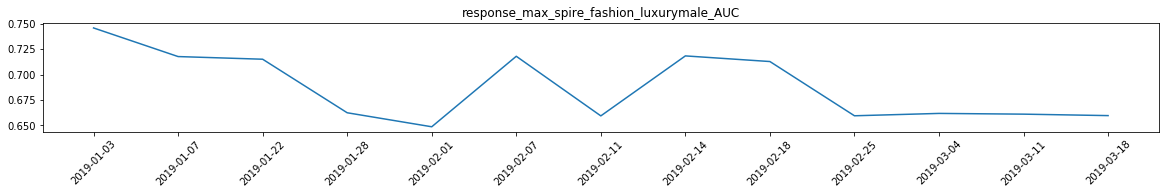

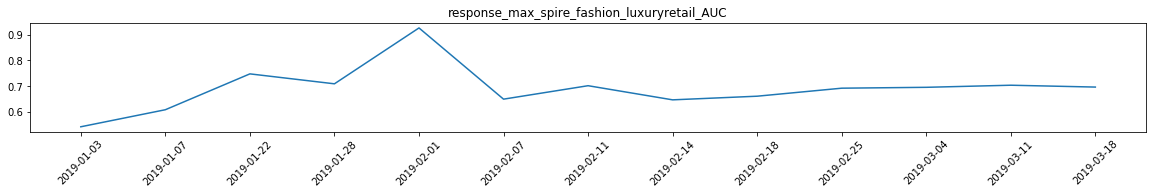

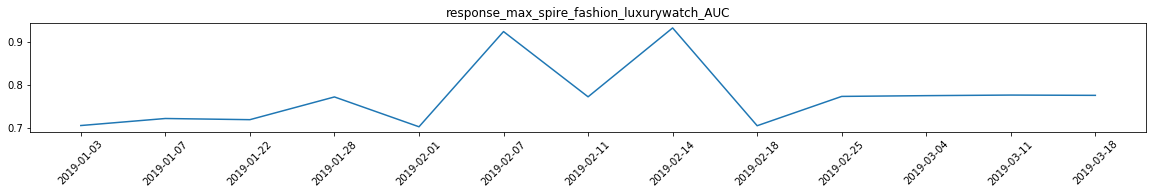

In [19]:
for i in range(5):
    plt.figure(figsize=(20, 2))
    plt.plot(model_5_good_auc.iloc[:,0],model_5_good_auc[model_list_auc[i]])
    plt.xticks(rotation=45)
    plt.title(model_list_auc[i]) 

for model5, meaningful auc is on 2019-01-03, 2019-01-07, 2019-01-22, 2019-01-28, 2019-02-01, 2019-02-07, 2019-02-11, 2019-02-14, 2019-02-18, 2019-02-25, 2019-03-04, 2019-03-11, 2019-03-18.

In [20]:
model_5_good_auc_coeff_time = model_5_good_auc_coeff.loc[model_5_good_auc_coeff['Date'].isin(['2019-01-03','2019-01-07','2019-01-22','2019-01-28','2019-02-01','2019-02-07','2019-02-11','2019-02-14','2019-02-18','2019-02-25','2019-03-04','2019-03-11','2019-03-18'])]
model_5_good_auc_coeff_time

Date  brand_adnetwork  brand_adnetwork_bin  brand_allure  \
0   2019-01-03         0.000000             0.127569      0.000000   
1   2019-01-07         0.000000             0.000000      0.000000   
5   2019-01-22         0.000000             0.609086      0.000553   
7   2019-01-28         0.000376             0.246923      0.001640   
8   2019-02-01         0.000018             0.162356      0.000000   
10  2019-02-07         0.000000             0.094348      0.000000   
11  2019-02-11         0.000468             0.289865      0.000874   
12  2019-02-14         0.000000             0.046747      0.000000   
13  2019-02-18         0.000000             0.120343      0.001064   
15  2019-02-25         0.000523             0.327789      0.000000   
17  2019-03-04         0.000324             0.309274      0.000232   
19  2019-03-11         0.000269             0.287572      0.000189   
21  2019-03-18         0.000356             0.323398      0.000241   

    brand_allure_bin  brand_architecturaldigest  \
0           0.000000                   0.000000   
1           0.000000                   0.000000   
5           0.529659                   0.000000   
7           0.697913                   0.000626   
8           0.887706                  -0.000056   
10          0.000000                   0.000000   
11          0.764975                   0.000658   
12          0.000000                   0.000000   
13          0.589274                   0.000000   
15          0.908292                   0.000297   
17          0.774237                   0.000142   
19          0.712195                   0.000743   
21          0.821253                   0.000000   

    brand_architecturaldigest_bin  brand_arstechnica  brand_arstechnica_bin  \
0                        0.000000           0.000000               0.034014   
1                        0.000000           0.000000               0.000000   
5                        0.292928          -0.000009              -0.217150   
7                        0.447924          -0.000006              -0.224777   
8                        0.392855           0.000000              -0.119545   
10                       0.000000           0.000000               0.000000   
11                       0.552264           0.000000              -0.272794   
12                       0.000000           0.000000               0.000000   
13                       0.354177           0.000000              -0.003289   
15                       0.601958           0.000000              -0.281209   
17                       0.546425           0.000000              -0.274936   
19                       0.541886          -0.000123              -0.321348   
21                       0.618171           0.000000              -0.286676   

    brand_bonappetit  ...  zip_Workers16PlusPctOutsideStateofResidence  \
0           0.000000  ...                                     0.000000   
1           0.000000  ...                                     0.000000   
5           0.000984  ...                                     0.000579   
7           0.000320  ...                                    -0.000002   
8           0.000156  ...                                    -0.000007   
10          0.000000  ...                                     0.000000   
11          0.000919  ...                                     0.000000   
12          0.000000  ...                                     0.000000   
13          0.002107  ...                                    -0.000008   
15          0.000470  ...                                    -0.000013   
17          0.000199  ...                                     0.000000   
19          0.000066  ...                                     0.000010   
21          0.000255  ...                                    -0.000088   

    zip_Workers16PlusPctPublicTransportationBusortrolleybus  \
0                                            0.000000         
1                                           

# 2.2 Visulization of variables coefficient in each of the 5 models

### 2.2.1 Aggregate by median 

In [21]:
#set column: Date as index
model_1_good_auc_coeff_time.set_index("Date", inplace = True)
model_2_good_auc_coeff_time.set_index("Date", inplace = True)
model_3_good_auc_coeff_time.set_index("Date", inplace = True)
model_4_good_auc_coeff_time.set_index("Date", inplace = True)
model_5_good_auc_coeff_time.set_index("Date", inplace = True)

In [22]:
#check the number of category of variables 
model_1_good_auc_coeff_time.columns.str[:4].value_counts()

zip_    521
topi    301
coun    224
bran     48
refe      7
plat      3
days      1
scop      1
life      1
page      1
dtype: int64

In [23]:
# define function to aggregate the variables in each model
def agg_model (model_df):
    i=model_df
    df_zip = i[i.columns[pd.Series(i.columns).str.startswith('zip')]]
    df_zip["zip"]= df_zip.median(axis=1)
    zip_f = df_zip.iloc[:,-1].to_frame()
        
    df_top = i[i.columns[pd.Series(i.columns).str.startswith('topi')]]
    df_top["topic"]= df_top.median(axis=1)
    topic_f=df_top.iloc[:,-1].to_frame()
        
    df_coun = i[i.columns[pd.Series(i.columns).str.startswith('coun')]]
    df_coun["country"]= df_coun.median(axis=1)
    coun_f=df_coun.iloc[:,-1].to_frame()
        
    df_bran = i[i.columns[pd.Series(i.columns).str.startswith('bran')]]
    df_bran["brand"]= df_bran.median(axis=1)
    brand_f=df_bran.iloc[:,-1].to_frame()
        
        
    df_refe = i[i.columns[pd.Series(i.columns).str.startswith('refe')]]
    df_refe["referrer"]= df_refe.median(axis=1)
    refe_f=df_refe.iloc[:,-1].to_frame()
        
    df_plat = i[i.columns[pd.Series(i.columns).str.startswith('plat')]]
    df_plat["platform"]= df_plat.median(axis=1)
    plat_f=df_plat.iloc[:,-1].to_frame()
        
    df_days = i[i.columns[pd.Series(i.columns).str.startswith('days')]]
    df_days["days_since_last_seen"]= df_days.median(axis=1)
    day_f=df_days.iloc[:,-1].to_frame()
        
    df_life = i[i.columns[pd.Series(i.columns).str.startswith('life')]]
    df_life["lifespan"]= df_life.median(axis=1)
    life_f=df_life.iloc[:,-1].to_frame()
        
    df_scop = i[i.columns[pd.Series(i.columns).str.startswith('scop')]]
    df_scop["scope_visits"]= df_scop.median(axis=1)
    scop_f=df_scop.iloc[:,-1].to_frame()
        
    df_page = i[i.columns[pd.Series(i.columns).str.startswith('page')]]
    df_page["pageviews"]= df_page.median(axis=1)
    page_f=df_page.iloc[:,-1].to_frame()        
        
    df= pd.concat([zip_f, topic_f,coun_f,brand_f,refe_f,plat_f,day_f,life_f,scop_f,page_f],axis = 1)
    return(df)
        

In [24]:
#['response_max_spire_auto_luxury_model','response_max_spire_fashion_luxuryjewelry_model','response_max_spire_fashion_luxurymale_model','response_max_spire_fashion_luxuryretail_model','response_max_spire_fashion_luxurywatch_model']
aggr_df1=agg_model(model_1_good_auc_coeff_time)
aggr_df2=agg_model(model_2_good_auc_coeff_time)
aggr_df3=agg_model(model_3_good_auc_coeff_time)
aggr_df4=agg_model(model_4_good_auc_coeff_time)
aggr_df5=agg_model(model_5_good_auc_coeff_time)

In [25]:
model_2_good_auc_coeff_time['days_since_last_seen']

Date
2019-01-03    0.000350
2019-01-07    0.000102
2019-01-14    0.005364
2019-01-17    0.001026
2019-01-28    0.000884
2019-02-01    0.001264
2019-02-11    0.000835
2019-02-18    0.000479
2019-02-25    0.001418
2019-03-04    0.000986
2019-03-07    0.005571
2019-03-11    0.001982
2019-03-18    0.002137
Name: days_since_last_seen, dtype: float64

In [26]:
#change data type of index: Date to datetime
for j in range(1,6):
    nam='aggr_df'+str(j)
    globals()[nam].index=pd.to_datetime(globals()[nam].index)

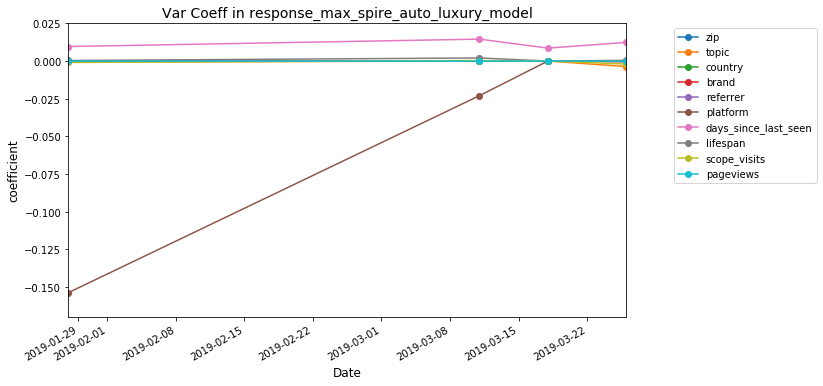

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,6))
aggr_df1.plot(ax=ax,style='-o')
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1)
plt.title('Var Coeff in response_max_spire_auto_luxury_model',fontsize=14)
plt.ylim((-0.17,0.025))
plt.xlabel('Date', fontsize=12)
plt.ylabel('coefficient', fontsize=12)
plt.show()

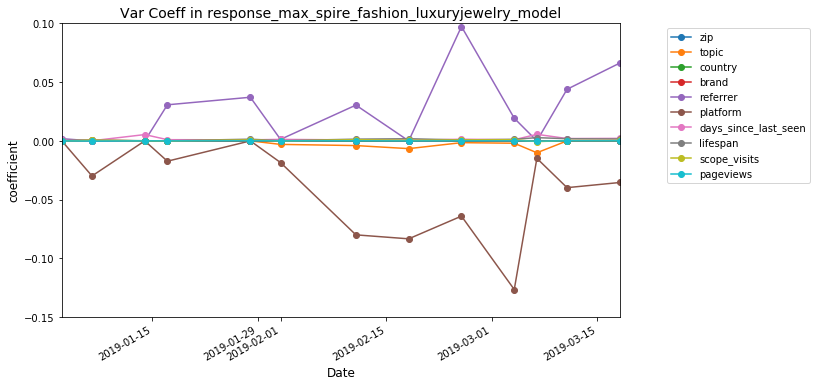

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,6))
aggr_df2.plot(ax=ax,style='-o')
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1)
plt.title('Var Coeff in response_max_spire_fashion_luxuryjewelry_model',fontsize=14)
plt.ylim((-0.15,0.1))
plt.xlabel('Date', fontsize=12)
plt.ylabel('coefficient', fontsize=12)
plt.show()

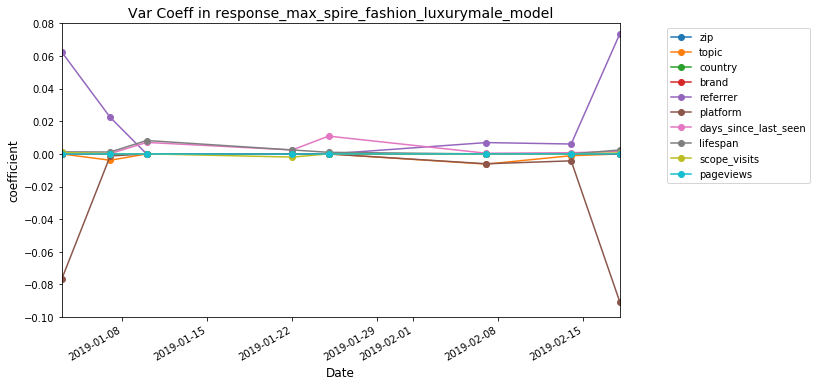

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,6))
aggr_df3.plot(ax=ax,style='-o')
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1)
plt.title('Var Coeff in response_max_spire_fashion_luxurymale_model',fontsize=14)
plt.ylim((-0.1,0.08))
plt.xlabel('Date', fontsize=12)
plt.ylabel('coefficient', fontsize=12)
plt.show()

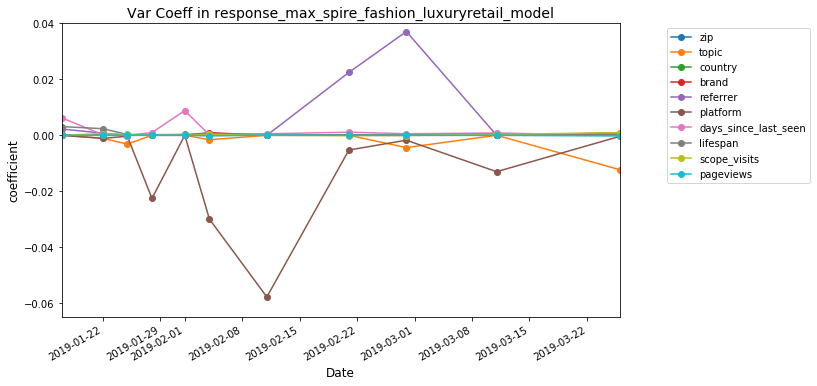

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,6))
aggr_df4.plot(ax=ax,style='-o')
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1)
plt.title('Var Coeff in response_max_spire_fashion_luxuryretail_model',fontsize=14)
plt.ylim((-0.065,0.04))
plt.xlabel('Date', fontsize=12)
plt.ylabel('coefficient', fontsize=12)
plt.show()

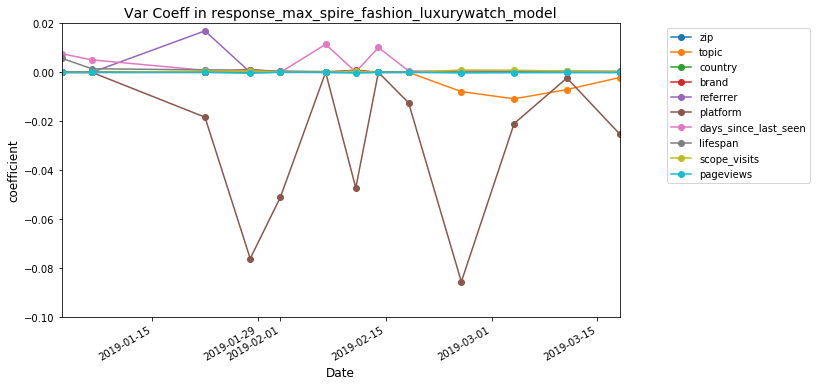

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,6))
aggr_df5.plot(ax=ax,style='-o')
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1)
plt.title('Var Coeff in response_max_spire_fashion_luxurywatch_model',fontsize=14)
plt.ylim((-0.1,0.02))
plt.xlabel('Date', fontsize=12)
plt.ylabel('coefficient', fontsize=12)
plt.show()

### 2.2.2 Aggregate by mean

In [32]:
# define function to aggregate the variables in each model
def agg_model_mean (model_df):
    i=model_df
    df_zip = i[i.columns[pd.Series(i.columns).str.startswith('zip')]]
    df_zip["zip"]= df_zip.mean(axis=1)
    zip_f = df_zip.iloc[:,-1].to_frame()
        
    df_top = i[i.columns[pd.Series(i.columns).str.startswith('topi')]]
    df_top["topic"]= df_top.mean(axis=1)
    topic_f=df_top.iloc[:,-1].to_frame()
        
    df_coun = i[i.columns[pd.Series(i.columns).str.startswith('coun')]]
    df_coun["country"]= df_coun.mean(axis=1)
    coun_f=df_coun.iloc[:,-1].to_frame()
        
    df_bran = i[i.columns[pd.Series(i.columns).str.startswith('bran')]]
    df_bran["brand"]= df_bran.mean(axis=1)
    brand_f=df_bran.iloc[:,-1].to_frame()
        
        
    df_refe = i[i.columns[pd.Series(i.columns).str.startswith('refe')]]
    df_refe["referrer"]= df_refe.mean(axis=1)
    refe_f=df_refe.iloc[:,-1].to_frame()
        
    df_plat = i[i.columns[pd.Series(i.columns).str.startswith('plat')]]
    df_plat["platform"]= df_plat.mean(axis=1)
    plat_f=df_plat.iloc[:,-1].to_frame()
        
    df_days = i[i.columns[pd.Series(i.columns).str.startswith('days')]]
    df_days["days_since_last_seen"]= df_days.mean(axis=1)
    day_f=df_days.iloc[:,-1].to_frame()
        
    df_life = i[i.columns[pd.Series(i.columns).str.startswith('life')]]
    df_life["lifespan"]= df_life.mean(axis=1)
    life_f=df_life.iloc[:,-1].to_frame()
        
    df_scop = i[i.columns[pd.Series(i.columns).str.startswith('scop')]]
    df_scop["scope_visits"]= df_scop.mean(axis=1)
    scop_f=df_scop.iloc[:,-1].to_frame()
        
    df_page = i[i.columns[pd.Series(i.columns).str.startswith('page')]]
    df_page["pageviews"]= df_page.mean(axis=1)
    page_f=df_page.iloc[:,-1].to_frame()        
        
    df= pd.concat([zip_f, topic_f,coun_f,brand_f,refe_f,plat_f,day_f,life_f,scop_f,page_f],axis = 1)
    return(df)

In [33]:
#['response_max_spire_auto_luxury_model','response_max_spire_fashion_luxuryjewelry_model','response_max_spire_fashion_luxurymale_model','response_max_spire_fashion_luxuryretail_model','response_max_spire_fashion_luxurywatch_model']
aggr_mean_df1=agg_model_mean(model_1_good_auc_coeff_time)
aggr_mean_df2=agg_model_mean(model_2_good_auc_coeff_time)
aggr_mean_df3=agg_model_mean(model_3_good_auc_coeff_time)
aggr_mean_df4=agg_model_mean(model_4_good_auc_coeff_time)
aggr_mean_df5=agg_model_mean(model_5_good_auc_coeff_time)

In [34]:
#change data type of index: Date to datetime
for j in range(1,6):
    nam='aggr_mean_df'+str(j)
    globals()[nam].index=pd.to_datetime(globals()[nam].index)

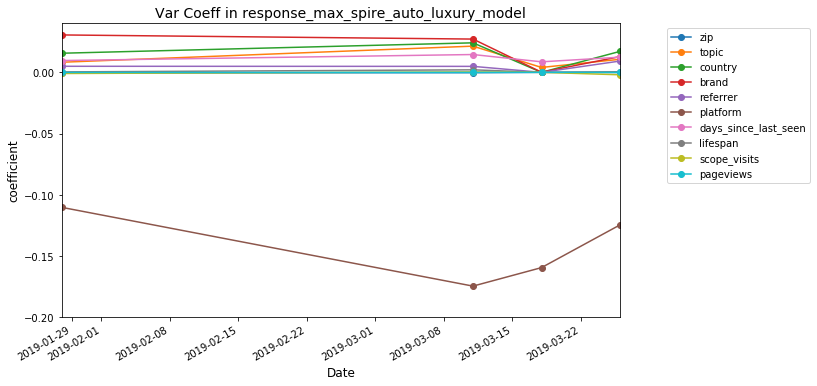

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,6))
aggr_mean_df1.plot(ax=ax,style='-o')
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1)
plt.title('Var Coeff in response_max_spire_auto_luxury_model',fontsize=14)
plt.ylim((-0.2,0.04))
plt.xlabel('Date', fontsize=12)
plt.ylabel('coefficient', fontsize=12)
plt.show()

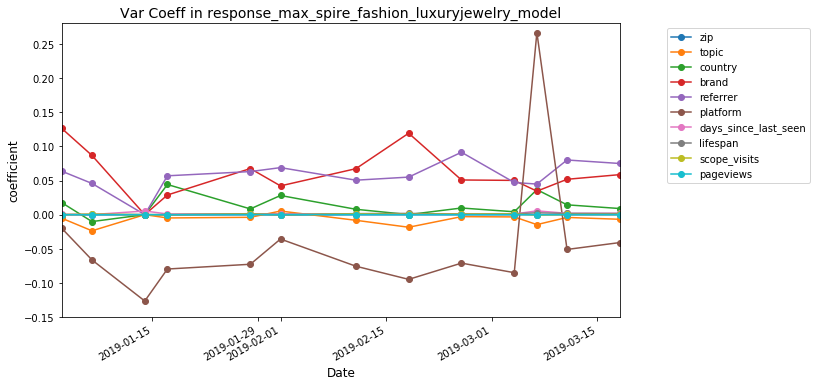

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,6))
aggr_mean_df2.plot(ax=ax,style='-o')
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1)
plt.title('Var Coeff in response_max_spire_fashion_luxuryjewelry_model',fontsize=14)
plt.ylim((-0.15,0.28))
plt.xlabel('Date', fontsize=12)
plt.ylabel('coefficient', fontsize=12)
plt.show()

In [37]:
model_2_good_auc_coeff_time[model_2_good_auc_coeff_time.columns[pd.Series(model_2_good_auc_coeff_time.columns).str.startswith('plat')]]

platform_desktop_bin  platform_mobile_bin  platform_tablet_bin
Date                                                                      
2019-01-03             -0.060152             0.000000             0.000000
2019-01-07             -0.029857             0.000000            -0.168967
2019-01-14             -0.379146             0.000000             0.000000
2019-01-17              0.286670            -0.017289            -0.508084
2019-01-28              0.000000             0.000000            -0.217788
2019-02-01              0.280029            -0.018418            -0.368588
2019-02-11             -0.079972             0.000000            -0.146404
2019-02-18             -0.083355             0.000000            -0.200764
2019-02-25             -0.064029             0.000000            -0.148712
2019-03-04             -0.128256             0.000000            -0.126485
2019-03-07             -0.014864             1.165944            -0.351295
2019-03-11             -0.039805             0.000000            -0.112946
2019-03-18             -0.035416             0.000000            -0.087098

In [38]:
aggr_mean_df2

zip     topic   country     brand  referrer  platform  \
Date                                                                     
2019-01-03 -0.000170 -0.005234  0.017515  0.126138  0.063619 -0.020051   
2019-01-07 -0.000272 -0.023613 -0.010121  0.086670  0.045704 -0.066275   
2019-01-14 -0.000010  0.000000  0.000000  0.000000  0.000000 -0.126382   
2019-01-17 -0.000416 -0.004809  0.044166  0.028774  0.056884 -0.079567   
2019-01-28 -0.000126 -0.003876  0.008419  0.067497  0.063080 -0.072596   
2019-02-01 -0.000528  0.005297  0.028074  0.042135  0.068855 -0.035659   
2019-02-11 -0.000136 -0.008252  0.007867  0.067313  0.050471 -0.075459   
2019-02-18 -0.000120 -0.018408  0.000120  0.119211  0.054979 -0.094706   
2019-02-25 -0.000131 -0.002891  0.009746  0.050772  0.091362 -0.070914   
2019-03-04 -0.000050 -0.003299  0.004234  0.050160  0.047096 -0.084914   
2019-03-07  0.000039 -0.014555  0.036626  0.034399  0.044782  0.266595   
2019-03-11 -0.000174 -0.004065  0.014394  0.051781  0.080033 -0.050917   
2019-03-18 -0.000146 -0.006747  0.008984  0.058601  0.074908 -0.040838   

            days_since_last_seen  lifespan  scope_visits  pageviews  
Date                                                                 
2019-01-03              0.000350  0.000228      0.000000   0.000000  
2019-01-07              0.000102  0.000633      0.000629  -0.000172  
2019-01-14              0.005364  0.000132      0.000000   0.000000  
2019-01-17              0.001026  0.000070     -0.000046   0.000000  
2019-01-28              0.000884  0.001456      0.000828   0.000031  
2019-02-01              0.001264  0.000110     -0.000091   0.000017  
2019-02-11              0.000835  0.001487      0.001035   0.000064  
2019-02-18              0.000479  0.001836      0.000492  -0.000074  
2019-02-25              0.001418  0.000792      0.000817  -0.000010  
2019-03-04              0.000986  0.001345      0.000987   0.000000  
2019-03-07              0.005571  0.002755     -0.000635  -0.000137  
2019-03-11              0.001982  0.001854      0.000317   0.000044  
2019-03-18              0.002137  0.001611      0.000338   0.000024

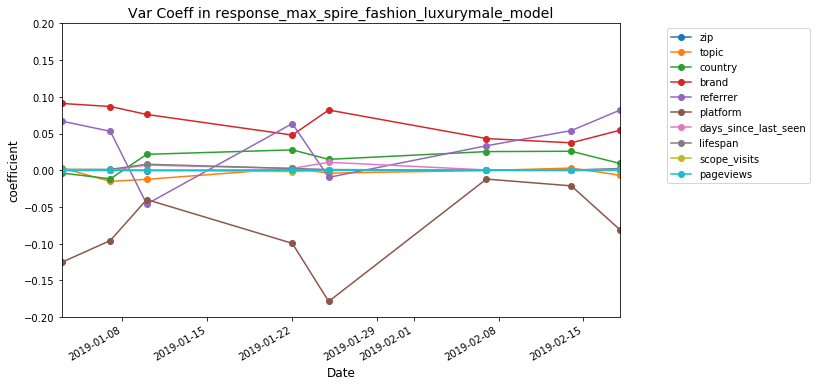

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,6))
aggr_mean_df3.plot(ax=ax,style='-o')
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1)
plt.title('Var Coeff in response_max_spire_fashion_luxurymale_model',fontsize=14)
plt.ylim((-0.2,0.2))
plt.xlabel('Date', fontsize=12)
plt.ylabel('coefficient', fontsize=12)
plt.show()

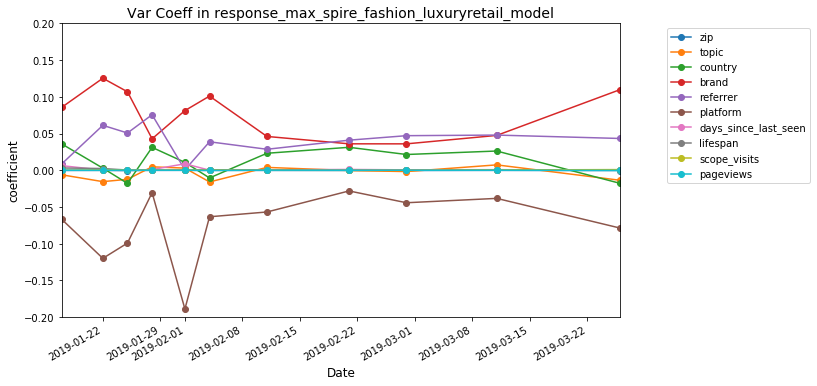

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,6))
aggr_mean_df4.plot(ax=ax,style='-o')
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1)
plt.title('Var Coeff in response_max_spire_fashion_luxuryretail_model',fontsize=14)
plt.ylim((-0.2,0.2))
plt.xlabel('Date', fontsize=12)
plt.ylabel('coefficient', fontsize=12)
plt.show()

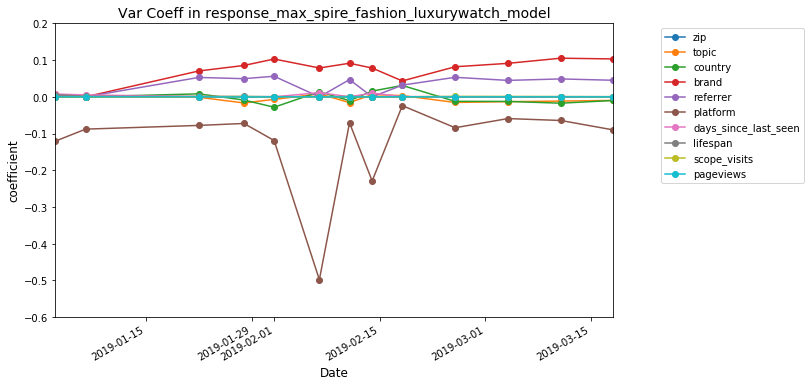

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,6))
aggr_mean_df5.plot(ax=ax,style='-o')
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1)
plt.title('Var Coeff in response_max_spire_fashion_luxurywatch_model',fontsize=14)
plt.ylim((-0.6,0.2))
plt.xlabel('Date', fontsize=12)
plt.ylabel('coefficient', fontsize=12)
plt.show()

## 2.3 Variables in Top Categories for Each Model

For model 1, the most significant category of variables(both positive and negative) are 'days_since_last_seen' and 'platform'

In [42]:
model_1_top_pos_var = model_1_good_auc_coeff.columns[model_1_good_auc_coeff.columns.str[:4] == 'plat'].to_list()
print(model_1_top_pos_var)

model_1_top_neg_var = model_1_good_auc_coeff.columns[model_1_good_auc_coeff.columns.str[:4] == 'days'].to_list()
print( model_1_top_neg_var)

['platform_desktop_bin', 'platform_mobile_bin', 'platform_tablet_bin']
['days_since_last_seen']


For model 2, 3, 4 and 5, their most significant category of variables(both positive and negative) are 'referrer' and 'platform'. So we only need to select the variables in model 2 in this step.

In [43]:
model_2345_top_pos_var = model_2_good_auc_coeff.columns[model_2_good_auc_coeff.columns.str[:4] == 'refe'].to_list()
print(model_2345_top_pos_var)

model_2345_top_neg_var = model_2_good_auc_coeff.columns[model_2_good_auc_coeff.columns.str[:4] == 'plat'].to_list()
print(model_2345_top_neg_var)

['referrer_direct_bin', 'referrer_internal_bin', 'referrer_newyorker_bin', 'referrer_referral_bin', 'referrer_search_bin', 'referrer_social_bin', 'referrer_wired_bin']
['platform_desktop_bin', 'platform_mobile_bin', 'platform_tablet_bin']


### Visulization of variables coefficients in the above significant categories for each model

In [44]:
model_1_top_var = model_1_top_pos_var + model_1_top_neg_var
model_2_top_var = model_2345_top_pos_var + model_2345_top_neg_var
model_3_top_var = model_2345_top_pos_var + model_2345_top_neg_var
model_4_top_var = model_2345_top_pos_var + model_2345_top_neg_var
model_5_top_var = model_2345_top_pos_var + model_2345_top_neg_var

In [45]:
model_1_top_coeff = model_1_good_auc_coeff_time[model_1_top_var]
model_2_top_coeff = model_2_good_auc_coeff_time[model_2_top_var]
model_3_top_coeff = model_3_good_auc_coeff_time[model_3_top_var]
model_4_top_coeff = model_4_good_auc_coeff_time[model_4_top_var]
model_5_top_coeff = model_5_good_auc_coeff_time[model_5_top_var]
model_top_coeff = [model_1_top_coeff,model_2_top_coeff,model_3_top_coeff,model_4_top_coeff,model_5_top_coeff]

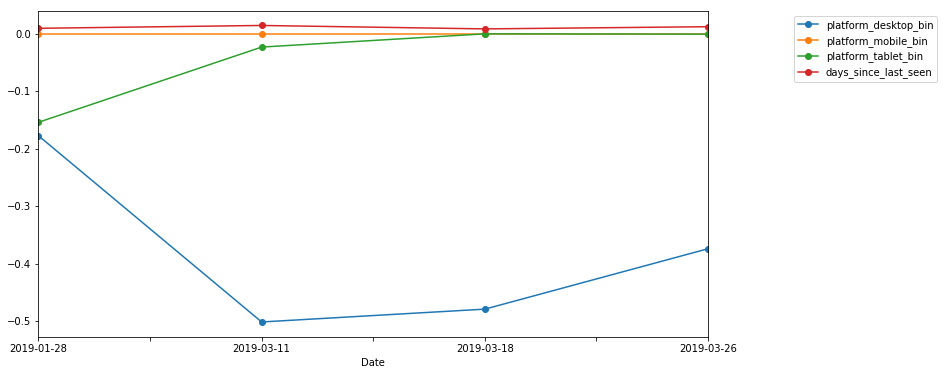

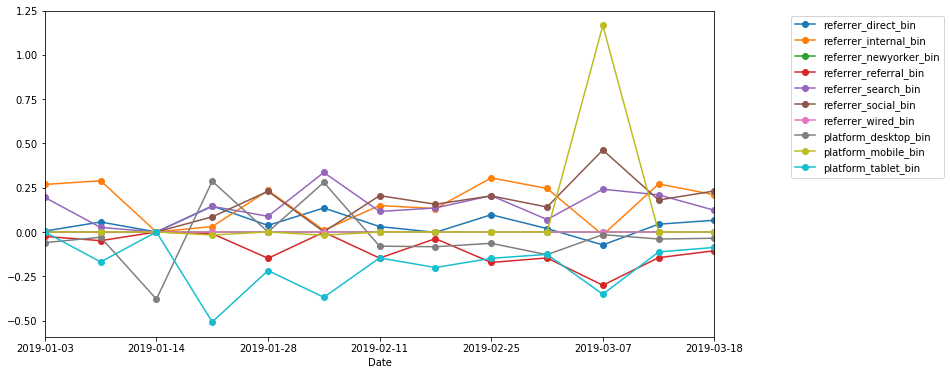

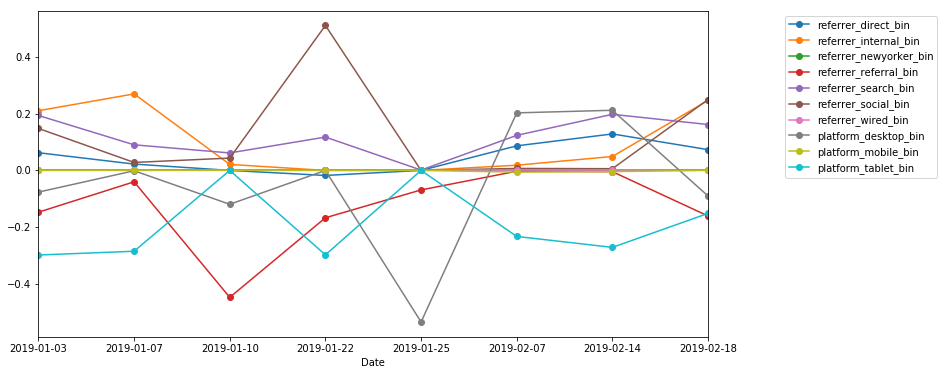

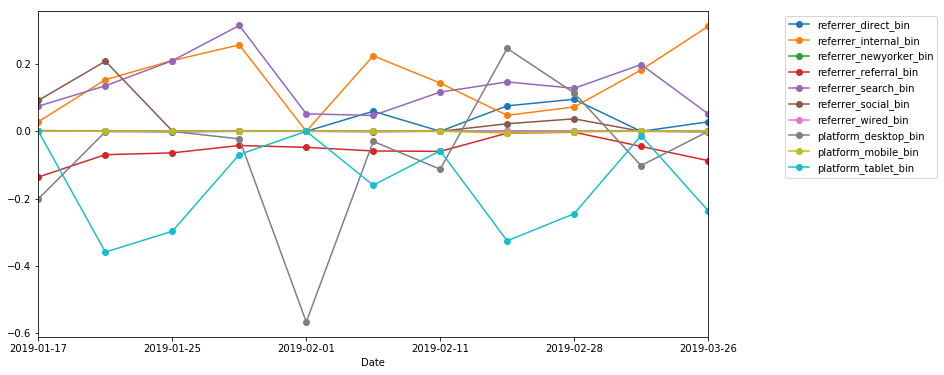

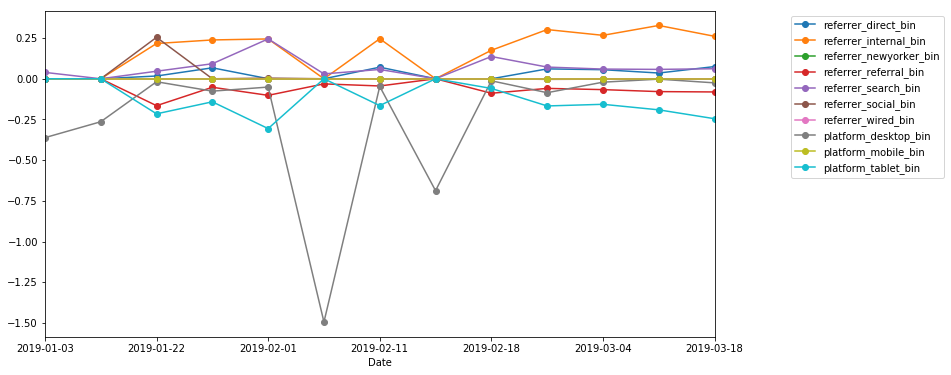

In [46]:
for i in range(5):
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,6))
    model_top_coeff[i].plot(ax=ax,style='-o')
    plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1)

## 2.4 Examine 3 Dimensions of Coefficients
### 2.4.1 Find top n variable of a model and check if they are shared among other models

In [47]:
model_median = pd.pivot_table(coeff,index=['variable'],aggfunc=np.median)
model_list = model_median.columns.tolist()

Define 10 and 20 most significant variables for model 

In [48]:
def top10 (col_name):
    '''find top 10 variables of a model'''
    model = model_median.sort_index(
        by=[col_name],ascending=False)
    model = model.reset_index()
    model_top_10 = model.iloc[np.r_[0:5,-5:0],]
    
    return model_top_10

def top20 (col_name):
    '''find top 20 variables of a model'''
    model = model_median.sort_index(
        by=[col_name],ascending=False)
    model = model.reset_index()
    model_top_20 = model.iloc[np.r_[0:10,-10:0],]
    
    return model_top_20

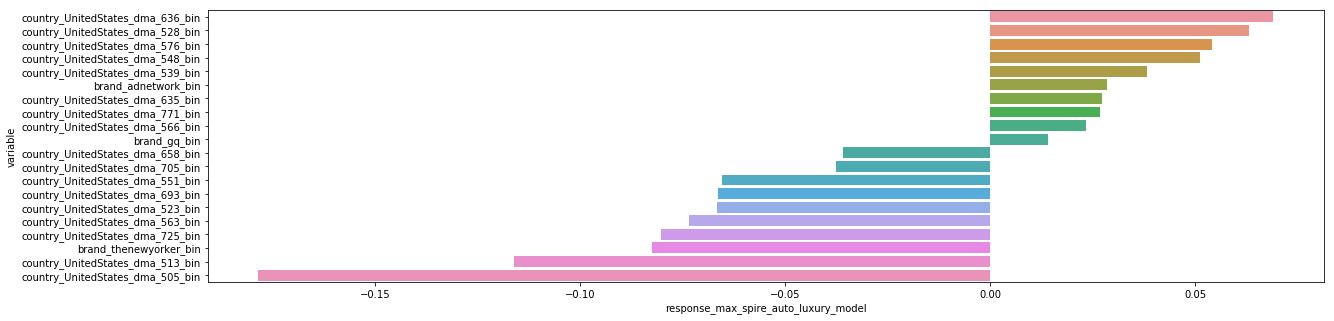

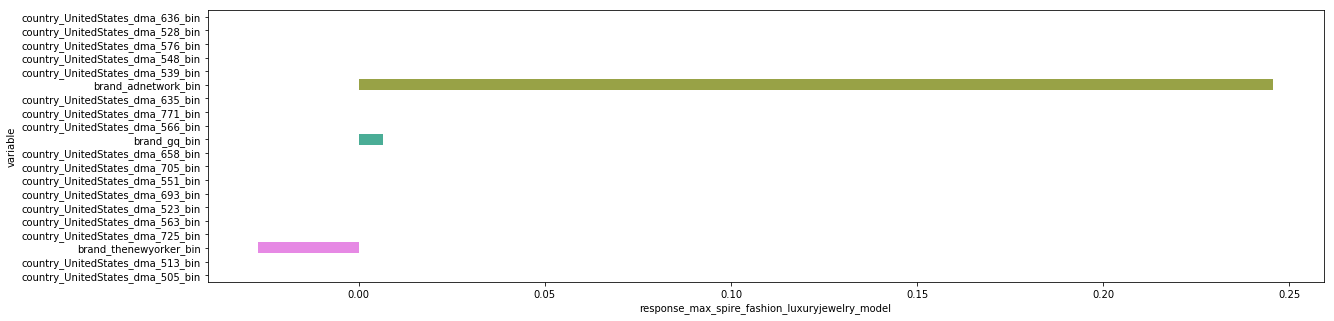

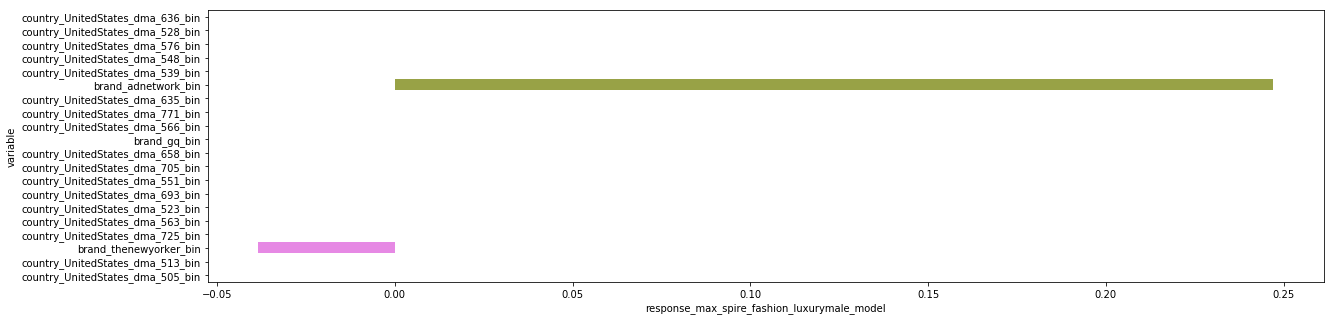

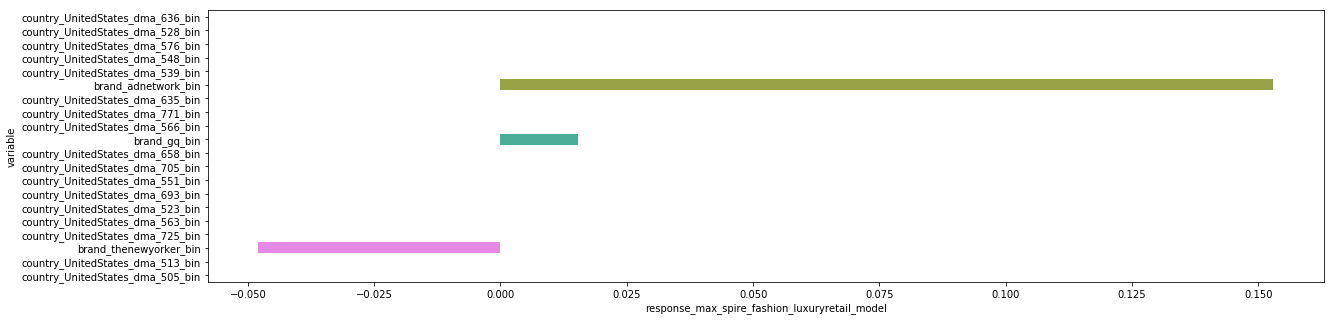

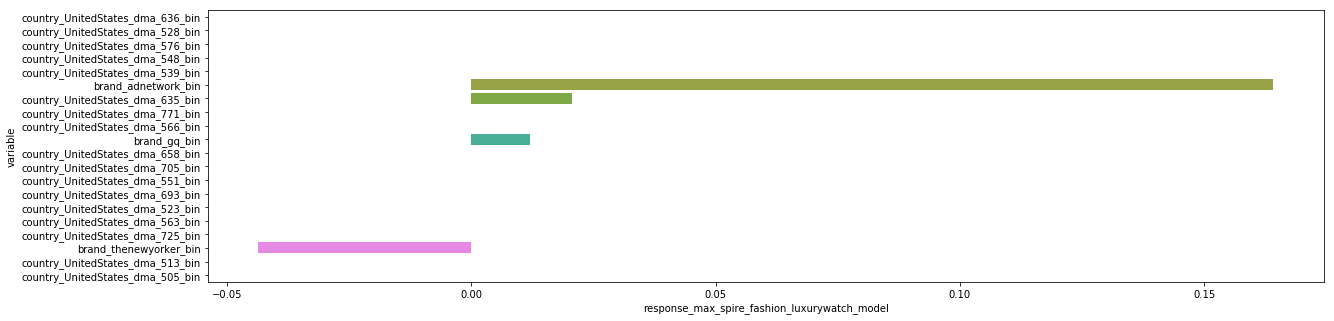

In [49]:
model_1_top_20 = top20(model_list[0])
for i in range(5):
    plt.figure(figsize=(20, 5))
    sns.barplot(y='variable',x=model_list[i],data=model_1_top_20)

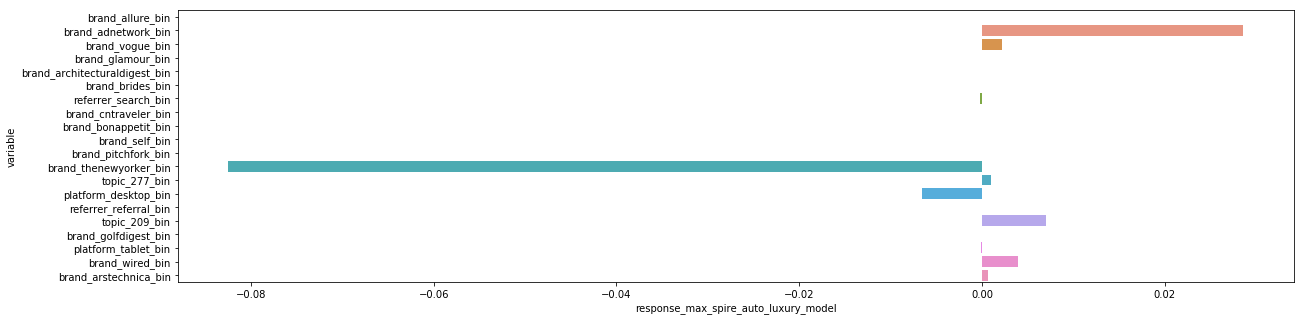

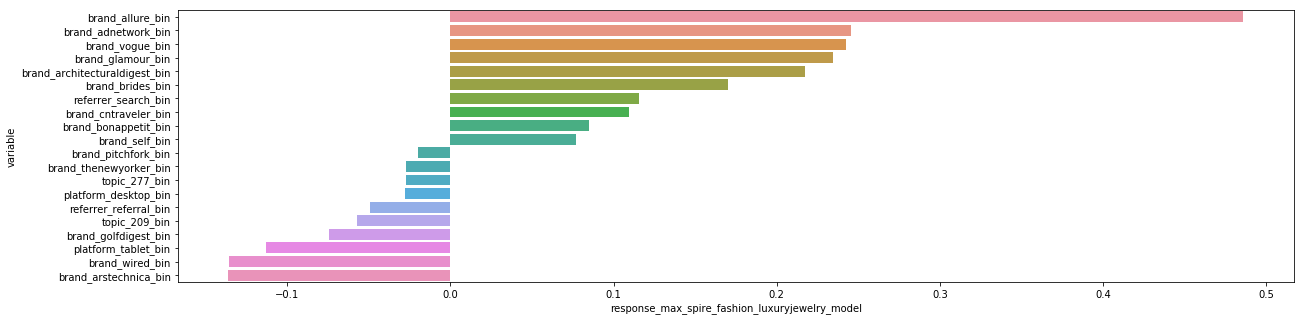

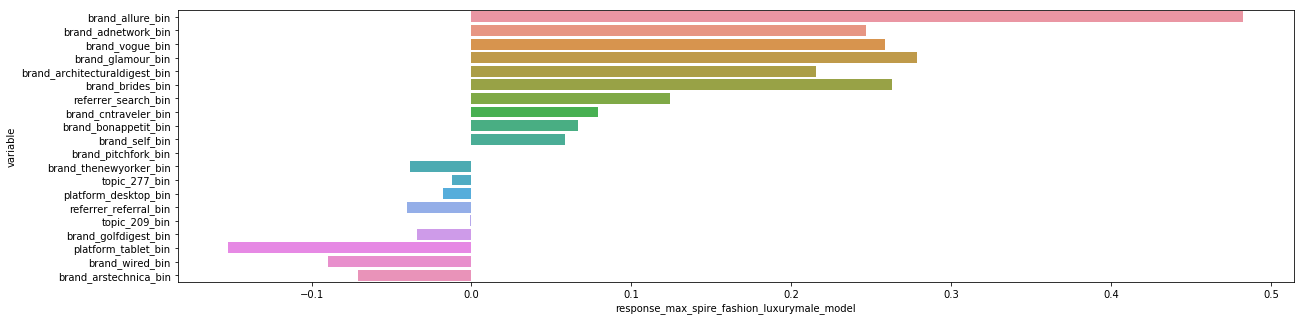

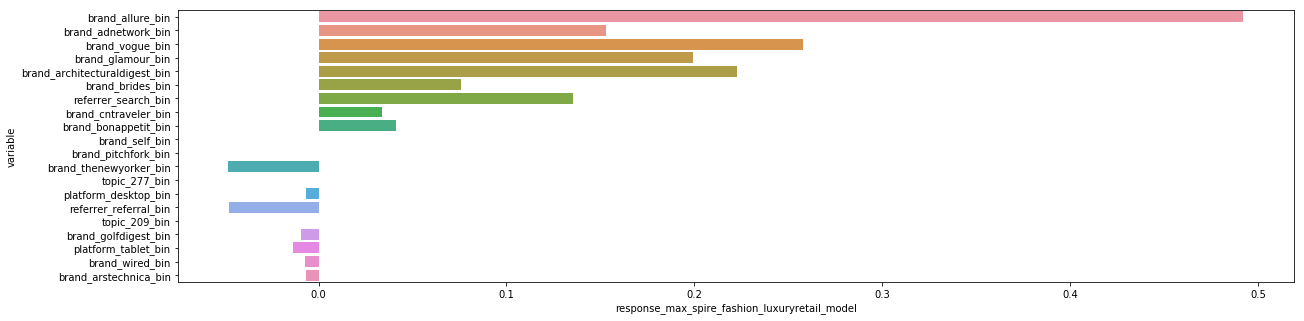

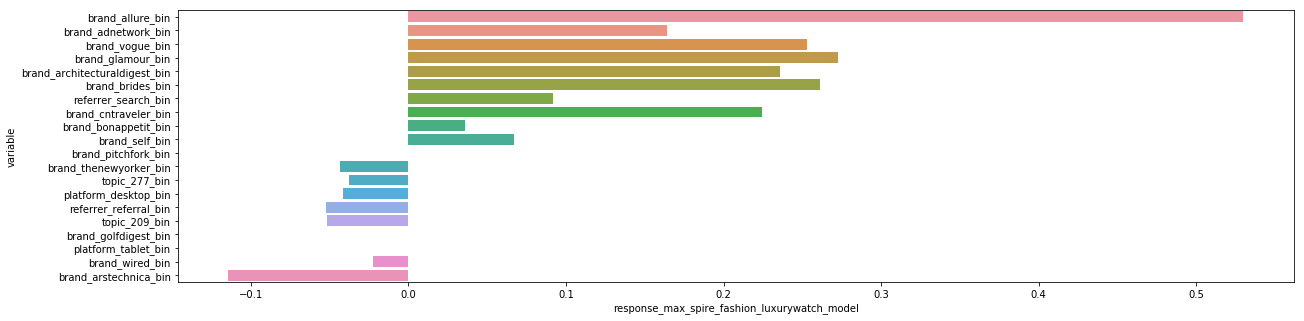

In [50]:
model_2_top_20 = top20(model_list[1])
for i in range(5):
    plt.figure(figsize=(20, 5))
    sns.barplot(y='variable',x=model_list[i],data=model_2_top_20)

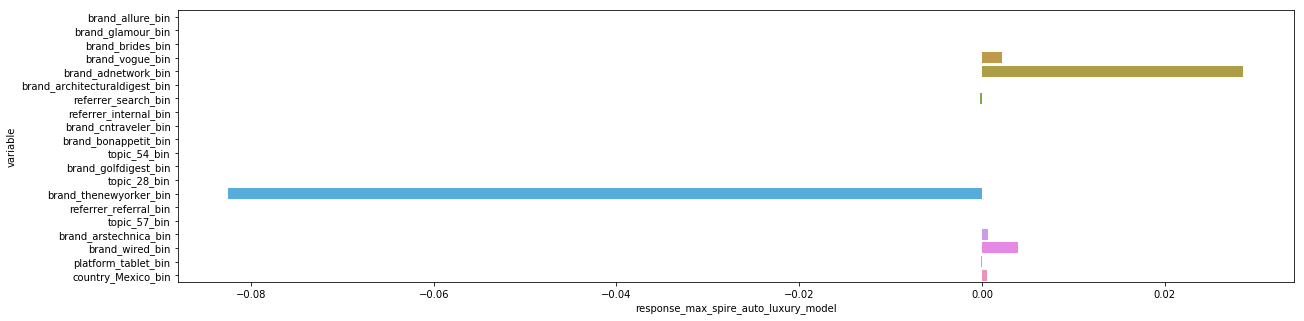

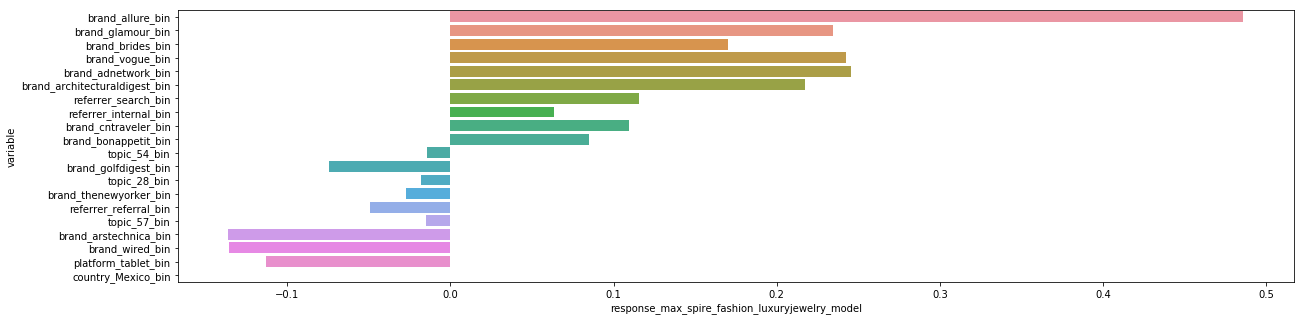

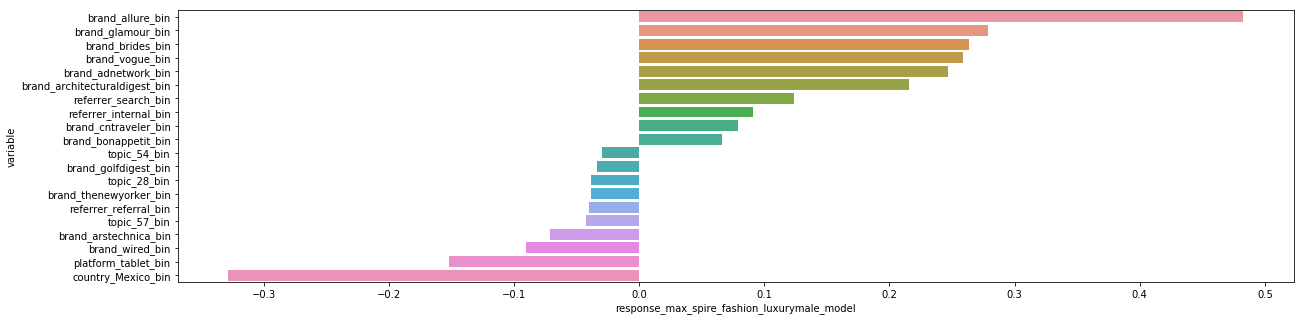

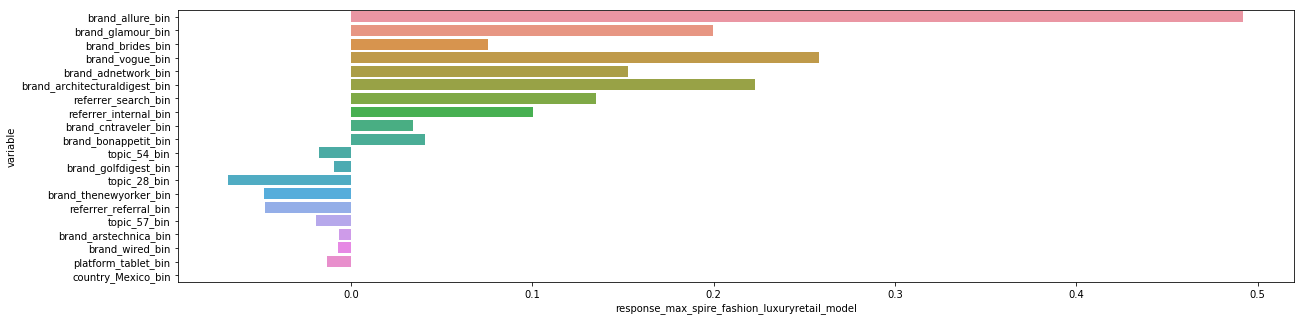

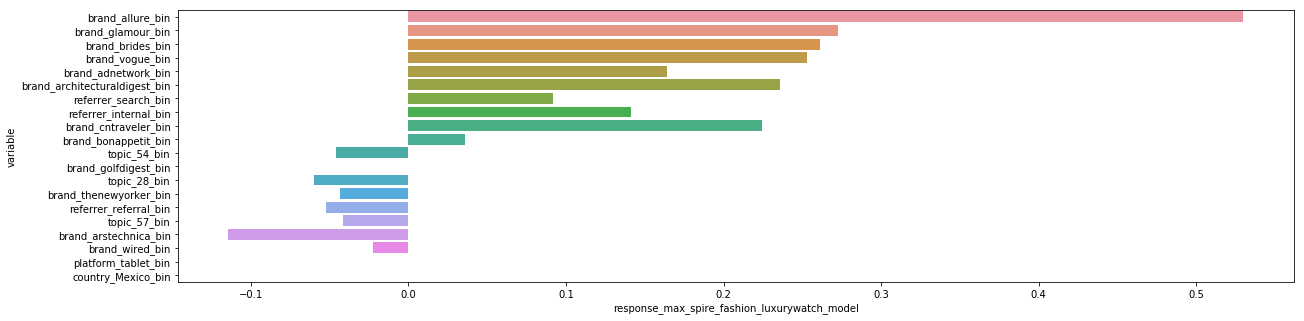

In [51]:
model_3_top_20 = top20(model_list[2])
for i in range(5):
    plt.figure(figsize=(20, 5))
    sns.barplot(y='variable',x=model_list[i],data=model_3_top_20)

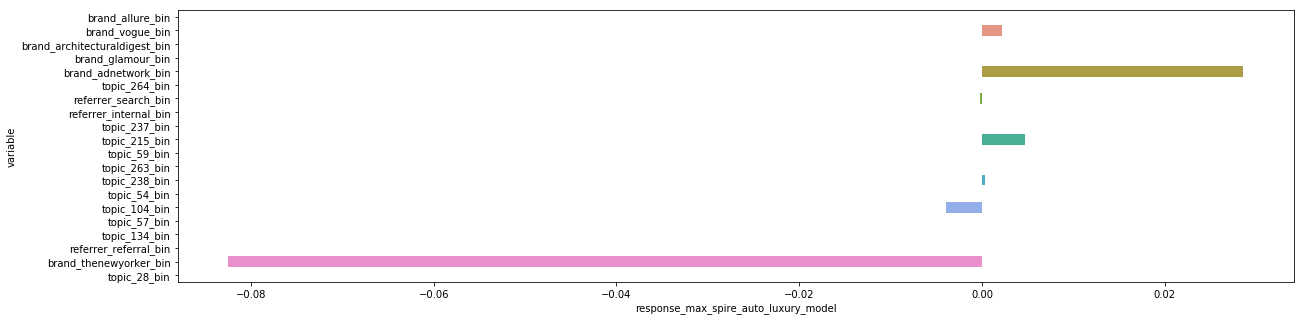

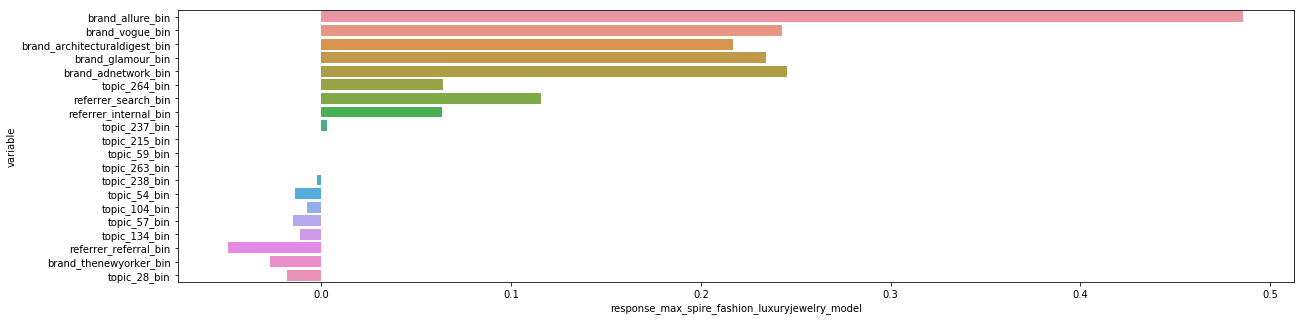

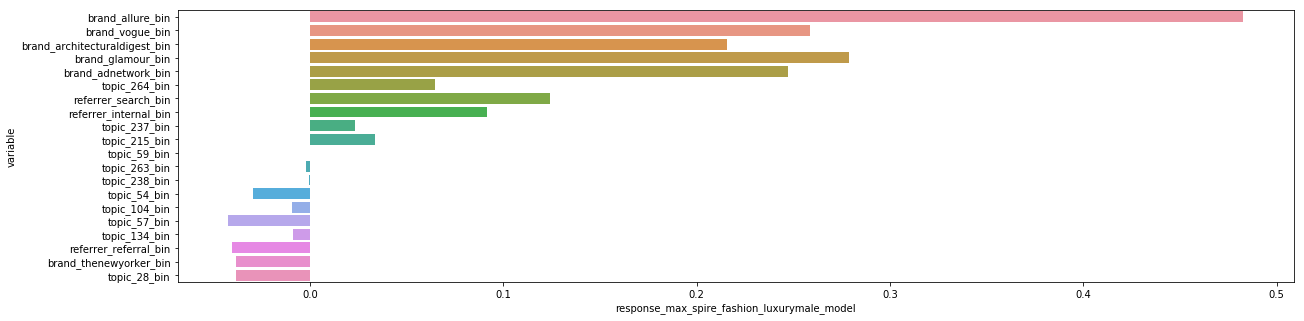

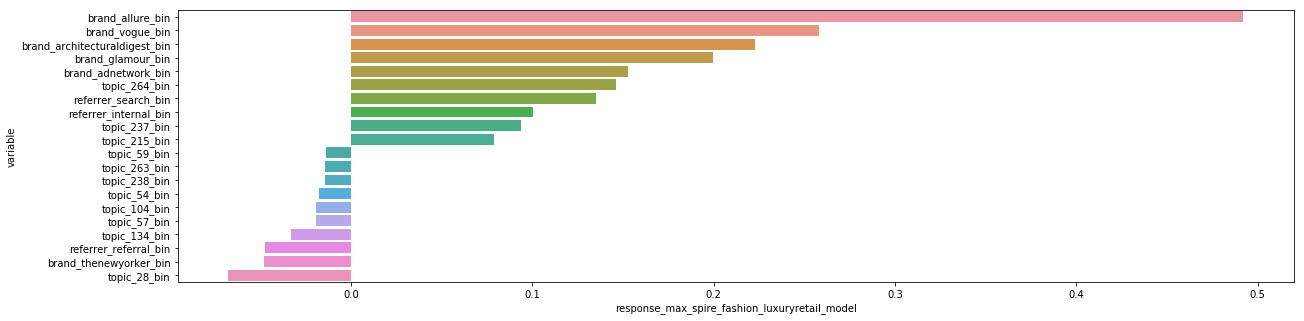

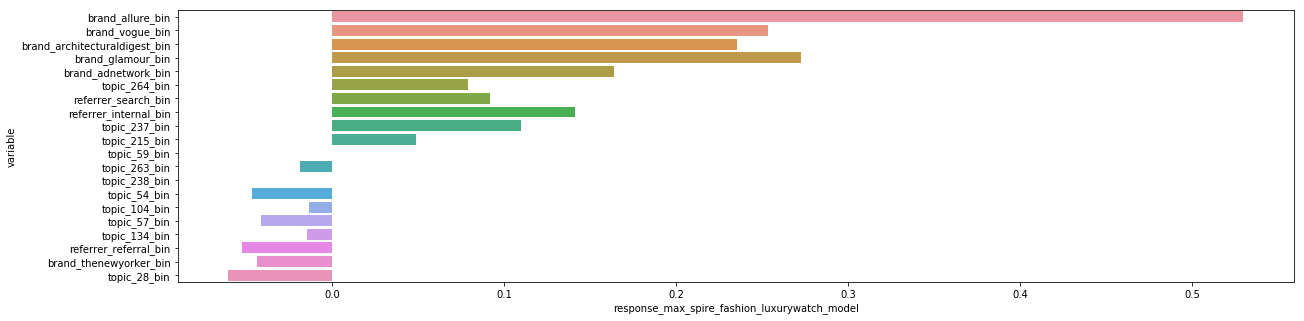

In [52]:
model_4_top_20 = top20(model_list[3])
for i in range(5):
    plt.figure(figsize=(20, 5))
    sns.barplot(y='variable',x=model_list[i],data=model_4_top_20)

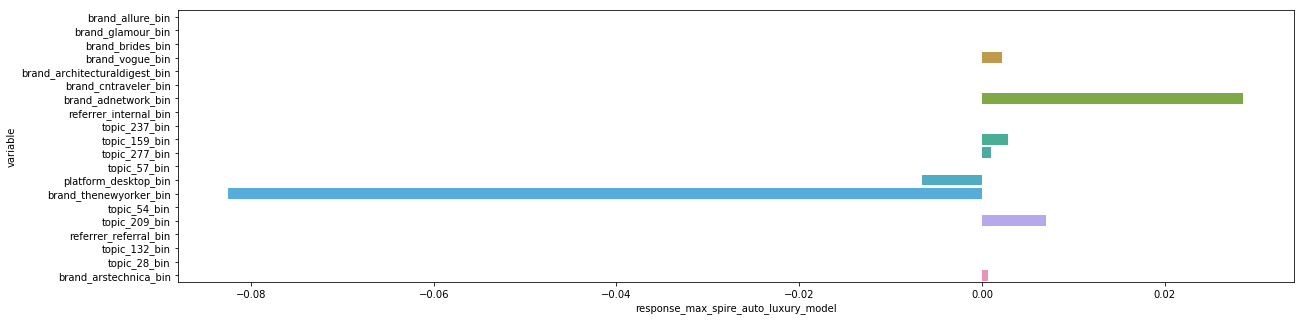

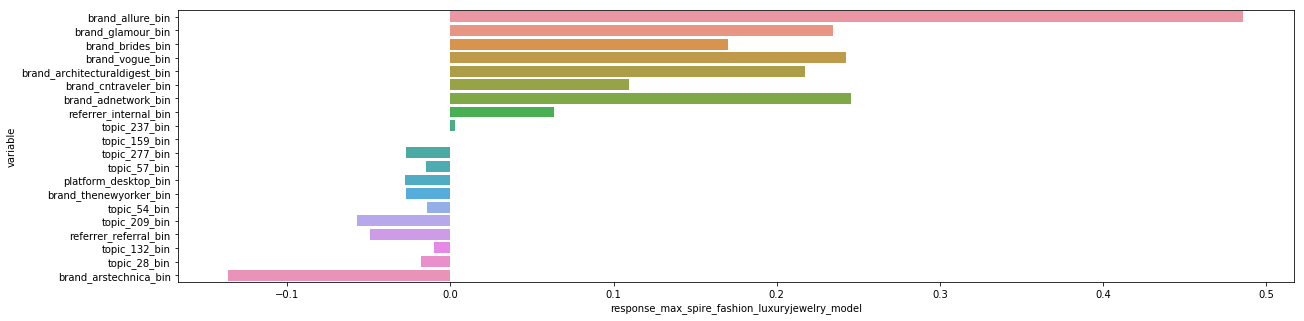

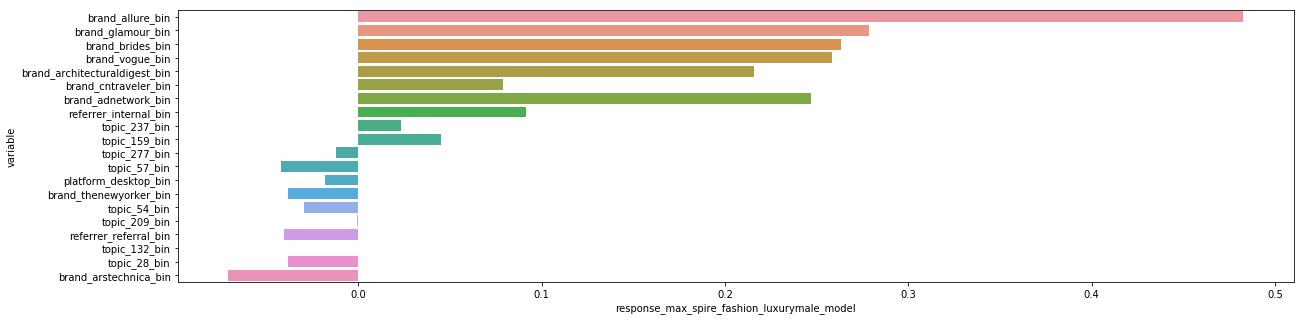

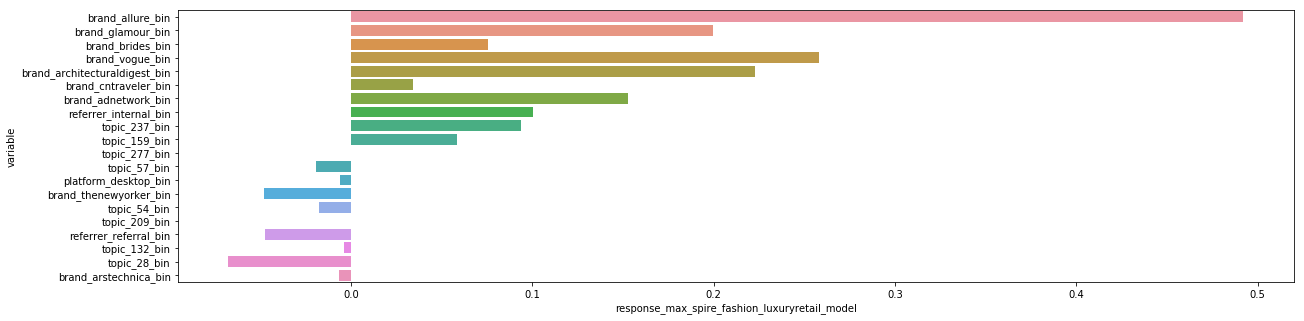

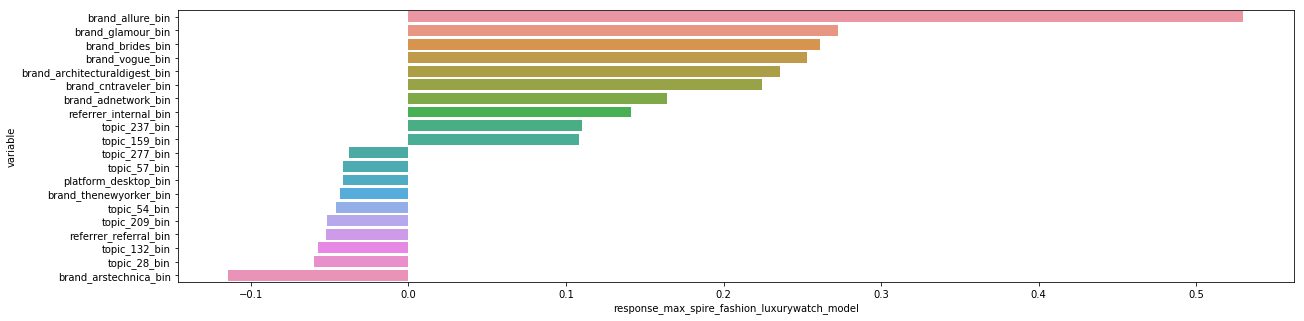

In [53]:
model_5_top_20 = top20(model_list[4])
for i in range(5):
    plt.figure(figsize=(20, 5))
    sns.barplot(y='variable',x=model_list[i],data=model_5_top_20)

We can see model 1 doesn’t share much common variables with the rest. Most of the significant variables of model 1 are zeros for the rest. On the other side, model 2 share some more common variables with model 3 to 5. Another interesting finding is that some variables have opposite impact on models, that it has positive impact on model 1 while negative impact on model 2.

We can find more common variables in top 20 graphs. Also, it seems that model 2-5 share a lot of common variables and model 1 is a lot different from the rest 4 models.
### 2.4.2 Find variable coefficients over time that are always positive, negative or zero.
Inspect on 95% CI.
#### 1. Define CI function

In [54]:
def inspect_CI(model,lower_bound = 0.025,upper_bound = 0.975):
    '''
    Look into coefficients of a model. Find the variable coefficients whose CI is above 0 or below 0.
    
    '''
    sub = coeff.loc[:,["Date","variable",model]]
    sub.columns = ['Date', 'variable', 'coefficient']
    lower = sub.groupby([sub.variable]).coefficient.quantile(lower_bound)
    upper = sub.groupby([sub.variable]).coefficient.quantile(upper_bound)
    sum_coef = sub.groupby([sub.variable]).coefficient.sum()
    dict_CI = {'variable':lower.index,'lower':lower.values,'upper':upper.values,'sum_coef':sum_coef.values}
    CI = pd.DataFrame(dict_CI)
    order = ['variable', 'lower','upper','sum_coef']
    CI = CI[order]
    pos = CI.loc[CI.lower > 0,:]
    neg = CI.loc[CI.upper < 0,:]
    zero = CI.loc[(CI.lower == 0) & (CI.upper == 0),:]
    print("Variables that always have positive impact: %s. \nVariables that always have negative impact: %s.\nVariables that always have none impact: %s." 
      %(pos.variable.tolist(), neg.variable.tolist(),zero.variable.tolist())) 
    return CI

In [55]:
def viz_coeff_over_time(variable,model):
    '''Visualize one variables coefficients change over time.
    '''
    var = coeff.loc[coeff.variable == variable,["Date",model]]
    var.columns = ["Date","coeff"]
    var = var.sort_values(by = ["Date"])
    var.reset_index(inplace = True, drop = True)
    plt.figure(figsize=(20, 2))
    plt.plot(var.iloc[:,0],var.iloc[:,1])
    plt.xticks(rotation=45)
    plt.title('coefficient of %s in %s change over time' %(variable,model)) 

In [56]:
model_coeff_list = coeff.columns.tolist()[2:]
model_coeff_list

['response_max_spire_auto_luxury_model',
 'response_max_spire_fashion_luxuryjewelry_model',
 'response_max_spire_fashion_luxurymale_model',
 'response_max_spire_fashion_luxuryretail_model',
 'response_max_spire_fashion_luxurywatch_model']

#### 2. Check positive, negtive or zero factors by models.
auto_luxury_model

In [57]:
auto_luxury_model_CI = inspect_CI(model_coeff_list[0])

Variables that always have positive impact: ['zip_AsianAlonePopPctAsianIndian', 'zip_RenteroccupiedHousingUnitsPct12501499', 'zip_TotalPopPctWestIndian']. 
Variables that always have negative impact: ['country_UnitedStates_dma_505_bin', 'zip_EmployedPop16PlusPctAgriculture', 'zip_HousingUnitsPctMobileHomes', 'zip_OccupiedHousingUnitsPctBottledTankOrLPGas', 'zip_OccupiedHousingUnitsPctUtilityGas', 'zip_RenteroccupiedHousingUnitsPct400499'].
Variables that always have none impact: ['referrer_newyorker_bin', 'referrer_wired_bin', 'topic_999_bin', 'zip_OwneroccupiedHousingUnitsPct20002004', 'zip_OwneroccupiedHousingUnitsPct2005orlater', 'zip_OwneroccupiedHousingUnitsPct20102014', 'zip_OwneroccupiedHousingUnitsPct2015orlater'].


In [58]:
auto_luxury_model_CI_80 = inspect_CI(model_coeff_list[0],lower_bound = 0.1,upper_bound = 0.9)

Variables that always have positive impact: ['country_UnitedStates_dma_528_bin', 'zip_AsianAlonePopPctAsianIndian', 'zip_EmployedPop16PlusPctTransportationWarehousing', 'zip_EmployedPop16PlusPctWholesaleTrade', 'zip_OccupiedHousingUnitsPctElectric', 'zip_OwneroccupiedHousingUnitsPct400000499999', 'zip_Pop5PlusPctOtherIndoEuropeanLanguage', 'zip_RenteroccupiedHousingUnitsPct12501499', 'zip_TotalPopPctGreek', 'zip_TotalPopPctItalian', 'zip_TotalPopPctWestIndian']. 
Variables that always have negative impact: ['country_UnitedStates_dma_505_bin', 'country_UnitedStates_dma_511_bin', 'zip_EmployedCivilianPop16PlusPctFarmingFishingForestry', 'zip_EmployedCivilianPop16PlusPctProduction', 'zip_EmployedPop16PlusPctAgriculture', 'zip_EmployedPop16PlusPctManufacturing', 'zip_FamiliesPct4500049999', 'zip_HHsAverageSupplementalSecurityIncomeinhundredsofUS', 'zip_HHsPct3500049999', 'zip_HHsPct3PlusVehicles', 'zip_HHsPct4000044999', 'zip_HHsPctWhiteAloneHHer', 'zip_HousingUnitsPctMobileHomes', 'zip_Oc

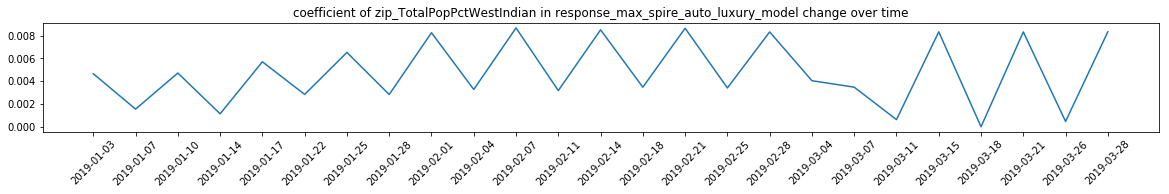

In [59]:
viz_coeff_over_time('zip_TotalPopPctWestIndian',model_coeff_list[0])

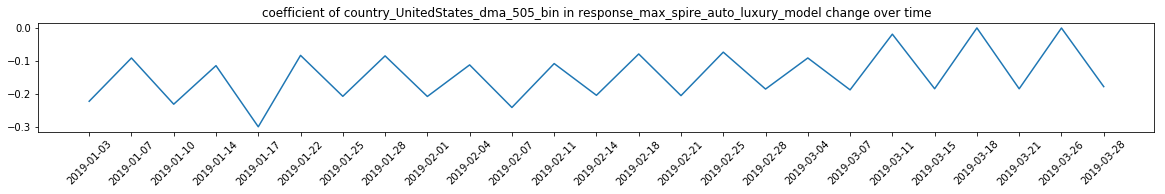

In [60]:
viz_coeff_over_time('country_UnitedStates_dma_505_bin',model_coeff_list[0])

fashion_luxuryjewelry_model

In [61]:
luxuryjewelry_model_CI = inspect_CI(model_coeff_list[1])

Variables that always have positive impact: ['lifespan']. 
Variables that always have negative impact: [].
Variables that always have none impact: ['country_Spain_bin', 'country_UnitedStates_bin', 'country_UnitedStates_dma_606_bin', 'country_UnitedStates_dma_698_bin', 'country_UnitedStates_dma_734_bin', 'country_UnitedStates_dma_798_bin', 'referrer_newyorker_bin', 'referrer_wired_bin', 'topic_133_bin', 'topic_999_bin', 'zip_OwneroccupiedHousingUnitsPct20002004', 'zip_OwneroccupiedHousingUnitsPct2005orlater', 'zip_OwneroccupiedHousingUnitsPct20102014', 'zip_OwneroccupiedHousingUnitsPct2015orlater'].


In [62]:
luxuryjewelry_model_CI_80 = inspect_CI(model_coeff_list[1],lower_bound = 0.1,upper_bound = 0.9)

Variables that always have positive impact: ['brand_allure_bin', 'lifespan', 'referrer_search_bin']. 
Variables that always have negative impact: ['brand_thenewyorker_bin', 'topic_104_bin', 'zip_HHsPct1PlusVehicles', 'zip_HHsPct2Person', 'zip_Pop5PlusPctEnglishOnly', 'zip_Pop5PlusPctSpeakingEnglishOnlyVeryWellorWell', 'zip_TotalPopPctMale', 'zip_Workers16PlusNotWorkingatHomePct129Minutes'].
Variables that always have none impact: ['brand_wired', 'country_Spain_bin', 'country_UnitedStates_bin', 'country_UnitedStates_dma_509_bin', 'country_UnitedStates_dma_514_bin', 'country_UnitedStates_dma_518_bin', 'country_UnitedStates_dma_520_bin', 'country_UnitedStates_dma_522_bin', 'country_UnitedStates_dma_529_bin', 'country_UnitedStates_dma_537_bin', 'country_UnitedStates_dma_542_bin', 'country_UnitedStates_dma_545_bin', 'country_UnitedStates_dma_549_bin', 'country_UnitedStates_dma_550_bin', 'country_UnitedStates_dma_552_bin', 'country_UnitedStates_dma_558_bin', 'country_UnitedStates_dma_569_bin

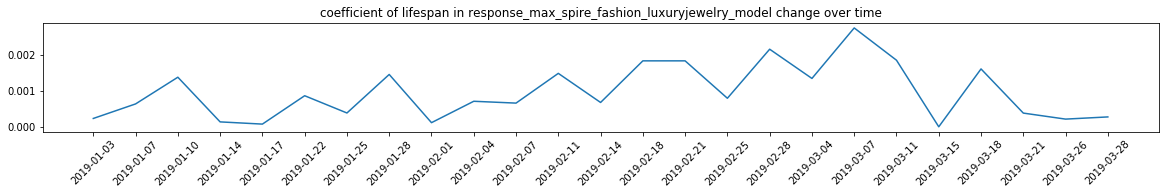

In [63]:
viz_coeff_over_time('lifespan',model_coeff_list[1])

fashion_luxurymale_model

In [64]:
luxurymale_model_CI = inspect_CI(model_coeff_list[2])

Variables that always have positive impact: ['referrer_search_bin']. 
Variables that always have negative impact: [].
Variables that always have none impact: ['country_UnitedStates_dma_583_bin', 'country_UnitedStates_dma_755_bin', 'referrer_newyorker_bin', 'referrer_wired_bin', 'topic_999_bin', 'zip_OwneroccupiedHousingUnitsPct20002004', 'zip_OwneroccupiedHousingUnitsPct2005orlater', 'zip_OwneroccupiedHousingUnitsPct20102014', 'zip_OwneroccupiedHousingUnitsPct2015orlater'].


In [65]:
luxurymale_model_CI_80 = inspect_CI(model_coeff_list[2],lower_bound = 0.1,upper_bound = 0.9)

Variables that always have positive impact: ['brand_allure_bin', 'brand_glamour_bin', 'brand_vogue_bin', 'lifespan', 'referrer_search_bin']. 
Variables that always have negative impact: ['brand_thenewyorker_bin', 'zip_ChildreninElementaryorHighSchoolPctInPublicSchool', 'zip_HHsPct2Person', 'zip_Pop18PlusPct5564', 'zip_TotalPopPctMale', 'zip_Workers16PlusNotWorkingatHomePct129Minutes'].
Variables that always have none impact: ['brand_len', 'brand_wired', 'country_UnitedStates_bin', 'country_UnitedStates_dma_522_bin', 'country_UnitedStates_dma_523_bin', 'country_UnitedStates_dma_532_bin', 'country_UnitedStates_dma_549_bin', 'country_UnitedStates_dma_552_bin', 'country_UnitedStates_dma_570_bin', 'country_UnitedStates_dma_575_bin', 'country_UnitedStates_dma_576_bin', 'country_UnitedStates_dma_583_bin', 'country_UnitedStates_dma_606_bin', 'country_UnitedStates_dma_625_bin', 'country_UnitedStates_dma_628_bin', 'country_UnitedStates_dma_634_bin', 'country_UnitedStates_dma_636_bin', 'country_U

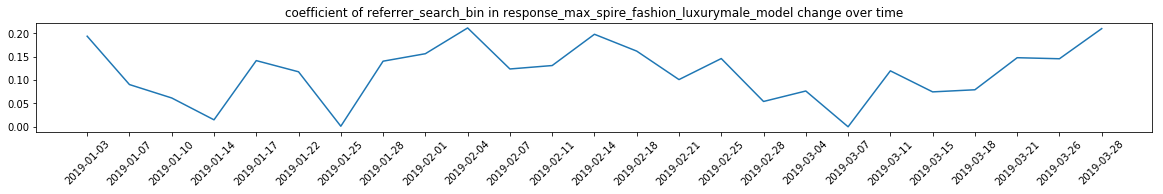

In [66]:
viz_coeff_over_time('referrer_search_bin',model_coeff_list[2])

fashion_luxuryretail_model

In [67]:
luxuryretail_model_CI = inspect_CI(model_coeff_list[3])

Variables that always have positive impact: ['brand_adnetwork_bin', 'lifespan', 'referrer_search_bin']. 
Variables that always have negative impact: [].
Variables that always have none impact: ['country_Mexico_bin', 'country_UnitedStates_bin', 'country_UnitedStates_dma_573_bin', 'country_UnitedStates_dma_745_bin', 'referrer_newyorker_bin', 'referrer_wired_bin', 'topic_999_bin', 'zip_FemalePop16PlusPctActiveMilitaryDuty', 'zip_OwneroccupiedHousingUnitsPct20002004', 'zip_OwneroccupiedHousingUnitsPct2005orlater', 'zip_OwneroccupiedHousingUnitsPct20102014', 'zip_OwneroccupiedHousingUnitsPct2015orlater'].


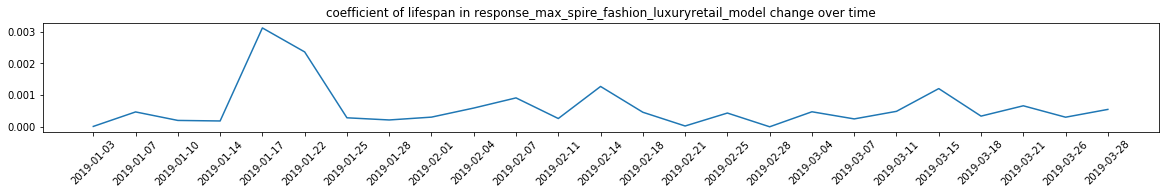

In [68]:
viz_coeff_over_time('lifespan',model_coeff_list[3])

fashion_luxurywatch_model

In [69]:
luxurywatch_model_CI = inspect_CI(model_coeff_list[4])

Variables that always have positive impact: ['lifespan']. 
Variables that always have negative impact: ['platform_desktop_bin', 'zip_Pop5PlusPctSpeakingEnglishOnlyVeryWellorWell', 'zip_TotalPopPctMale'].
Variables that always have none impact: ['country_Mexico_bin', 'country_UnitedStates_dma_581_bin', 'country_UnitedStates_dma_583_bin', 'country_UnitedStates_dma_625_bin', 'country_UnitedStates_dma_631_bin', 'country_UnitedStates_dma_642_bin', 'country_UnitedStates_dma_647_bin', 'country_UnitedStates_dma_673_bin', 'country_UnitedStates_dma_675_bin', 'country_UnitedStates_dma_682_bin', 'country_UnitedStates_dma_693_bin', 'country_UnitedStates_dma_717_bin', 'country_UnitedStates_dma_734_bin', 'country_UnitedStates_dma_745_bin', 'country_UnitedStates_dma_766_bin', 'country_UnitedStates_dma_771_bin', 'country_UnitedStates_dma_798_bin', 'referrer_newyorker_bin', 'referrer_wired_bin', 'topic_133_bin', 'topic_999_bin', 'zip_OwneroccupiedHousingUnitsPct20002004', 'zip_OwneroccupiedHousingUnitsP

In [70]:
luxurywatch_model_CI_80 = inspect_CI(model_coeff_list[4],lower_bound = 0.2,upper_bound = 0.8)

Variables that always have positive impact: ['brand_adnetwork_bin', 'brand_allure_bin', 'brand_brides_bin', 'days_since_last_seen', 'lifespan', 'referrer_search_bin']. 
Variables that always have negative impact: ['brand_thenewyorker_bin', 'platform_desktop_bin', 'topic_104_bin', 'topic_179_bin', 'topic_84_bin', 'zip_ChildreninElementaryorHighSchoolPctInPublicSchool', 'zip_CivilianNonInstitutionalPop1864PctWithDisability', 'zip_CivilianNonInstitutionalPopPctWithDisability', 'zip_CivilianNonInstitutionalPopPctWithPublicInsurance', 'zip_Civilians18PlusPctVeterans', 'zip_EmployedCivilianPop16PlusPctInstallationMaintenanceRepair', 'zip_EmployedCivilianPop16PlusPctOfficeAdministrativeSupport', 'zip_EmployedCivilianPop16PlusPctProduction', 'zip_EmployedPop16PlusPctRetail', 'zip_FamiliesPct3500049999', 'zip_FamiliesPct5000059999', 'zip_FamiliesPct5000074999', 'zip_FamiliesPct6000074999', 'zip_FamiliesPct7500099999', 'zip_FemalePop2064withOwnChildrenPctEmployed', 'zip_HHsPct1PlusVehicles', 'zi

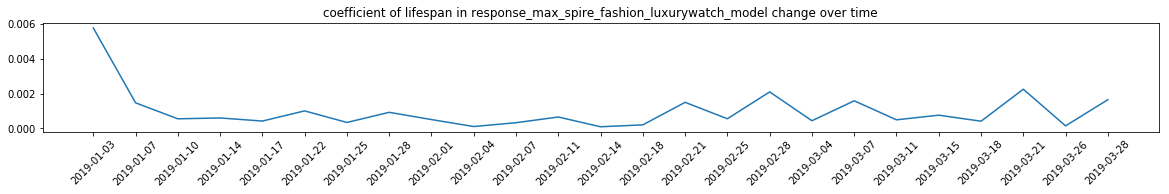

In [71]:
viz_coeff_over_time('lifespan',model_coeff_list[4])

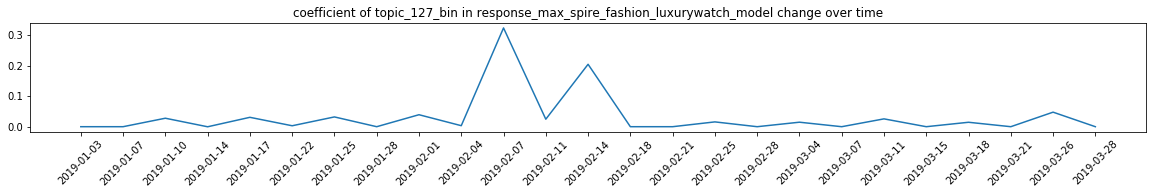

In [72]:
viz_coeff_over_time('topic_127_bin',model_coeff_list[4])

### 2.4.3 Check correlation between coefficients trend and auc trend
#### 1 Define function
checking correlation between a variable and the auc of a model

In [73]:
model_auc_list = auc.columns.tolist()
model_auc_list = model_auc_list[2:]
model_auc_list

['response_max_spire_auto_luxury_AUC',
 'response_max_spire_fashion_luxuryjewelry_AUC',
 'response_max_spire_fashion_luxurymale_AUC',
 'response_max_spire_fashion_luxuryretail_AUC',
 'response_max_spire_fashion_luxurywatch_AUC']

In [74]:
def corr_variable_auc(model_auc,model_coeff,variable):
    '''Find the correlation between one variable trend and auc trend in a model.
    '''
    coeff_sub = coeff.loc[coeff.variable == variable,["Date","variable",model_coeff]]
    coeff_sub = coeff_sub.sort_index(by=['Date'])
    coeff_sub.columns = ['Date','variable','coefficient']
    coeff_sub.reset_index(inplace = True, drop = True)
    auc_sub = auc.loc[auc.model == 'best model on full dataset',['Date',model_auc]]
    auc_sub = auc_sub.sort_values(by="Date")
    auc_sub.columns = ['Date','auc']
    coeff_sub['auc'] = auc_sub['auc'].tolist()
    return coeff_sub

In [75]:
def combine_coeff_auc_model(n):
    '''Combine coefficients of a model and auc of that model
    '''
    sub = coeff.loc[:,["Date","variable",model_coeff_list[n]]]
    var_name = sub.variable.unique().tolist()
    var_name.sort()
    all_var = pd.pivot_table(sub,index = ['Date'],columns=['variable'])
    all_var = pd.DataFrame(all_var.to_records())
    var_name.insert(0,"Date")   
    all_var.columns = var_name
    
    auc_sub = auc.loc[auc.model == 'best model on full dataset',['Date',model_auc_list[n]]]
    auc_sub = auc_sub.sort_values(by="Date")
    auc_sub.columns = ['Date','auc']
    
    all_var['auc'] = auc_sub['auc'].tolist()
    return all_var

In [76]:
def get_corr(df):
    '''Cleaned sorted correlation list from a correlation matrix'''
    df = df.iloc[:-1,-1]
    df = {'variable':df.index,'corr':df.values}
    df = pd.DataFrame(df)
    order = ['variable', 'corr']
    df = df[order]
    df = df.sort_values(by=['corr'], ascending=False).reset_index(drop = True)
    return df

#### 2 auto_luxury_model

In [77]:
combine_model_0 = combine_coeff_auc_model(0)
corr_model_0 = combine_model_0.corr()
corr_model_0 = get_corr(corr_model_0)

In [78]:
corr_model_0.head(10)

variable      corr
0                       topic_5_bin  0.924219
1              days_since_last_seen  0.914847
2  country_UnitedStates_dma_505_bin  0.827798
3              brand_golfdigest_bin  0.815108
4                     topic_255_bin  0.783932
5                     topic_237_bin  0.772905
6                     topic_159_bin  0.768530
7  country_UnitedStates_dma_523_bin  0.763390
8                     topic_187_bin  0.761503
9                     topic_199_bin  0.759507

In [79]:
corr_model_0 = corr_model_0.iloc[:-7,:]
corr_model_0.tail(10)

variable      corr
1091             zip_HousingUnitsAveragePersonsPerRoom -0.800905
1092                                     topic_114_bin -0.810830
1093                             zip_TotalPopPctFemale -0.813538
1094                                      topic_54_bin -0.816711
1095                         zip_TotalPopPctWestIndian -0.820234
1096                                      topic_80_bin -0.832891
1097                              zip_HHsPctFemaleHHer -0.851909
1098  zip_Pop5PlusPctSpeakingEnglishOnlyVeryWellorWell -0.894980
1099                               zip_TotalPopPctMale -0.898395
1100                              platform_desktop_bin -0.916942

#### Result:
For model auto_luxury_model, the most correlated variable patterns with auc trend.
#### Visualization:

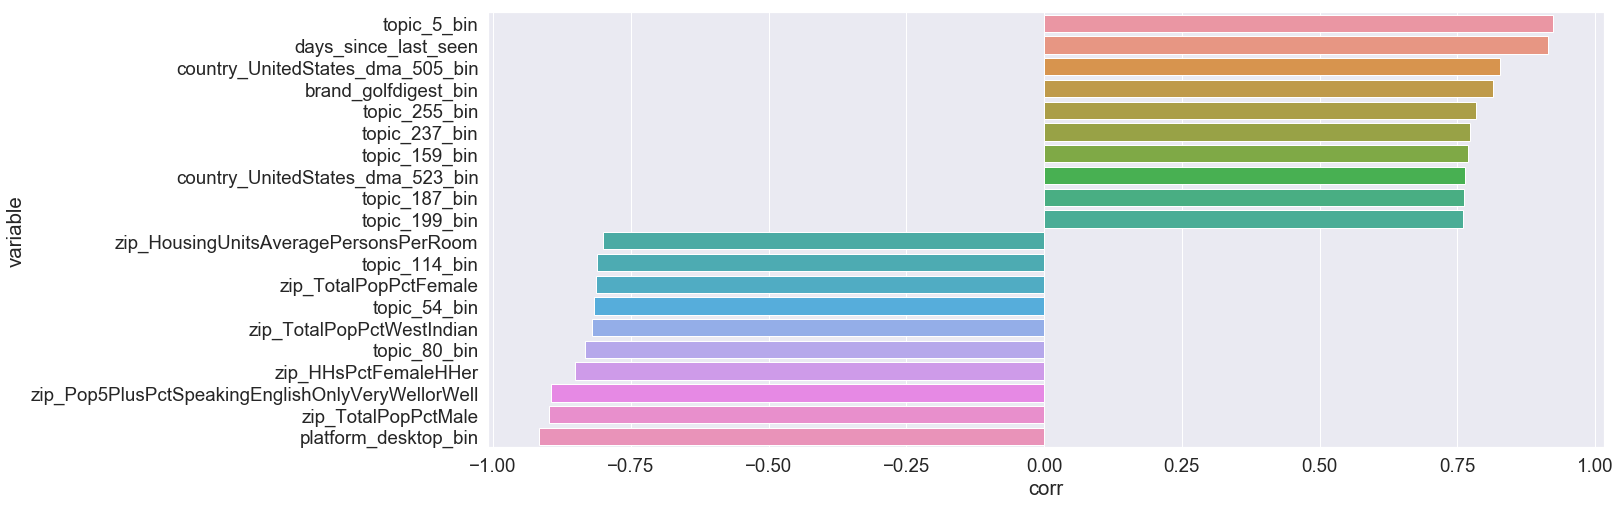

In [80]:
top_20 = pd.concat([corr_model_0.head(10),corr_model_0.tail(10)])
#top_20.to_csv("model_0_var_auc_corr.csv")
plt.figure(figsize=(20, 8))
#plt.xticks(rotation=45)
sns.set(font_scale=1.7)
sns_plot = sns.barplot(x="corr", y="variable", data=top_20)
pic = sns_plot.get_figure()
pic.savefig('model_0_var_auc_corr.png')

#### 3 fashion_luxuryjewelry_model

In [81]:
combine_model_1 = combine_coeff_auc_model(1)
corr_model_1 = combine_model_1.corr()
corr_model_1 = get_corr(corr_model_1)

In [82]:
corr_model_1.head(10)

variable      corr
0                                 country_Mexico_bin  0.776283
1                          zip_FamiliesPct200000Plus  0.639827
2                 zip_TotalPopPctNaturalizedCitizens  0.633077
3                                    brand_vogue_bin  0.628676
4                      brand_architecturaldigest_bin  0.612715
5             zip_HHer2544MedianIncomeinhundredsofUS  0.584073
6  zip_HHswithHispanicHHerMedianIncomeinhundredsofUS  0.583023
7                          zip_FamiliesPct150000Plus  0.578037
8           zip_Pop5PlusPctOtherIndoEuropeanLanguage  0.576842
9                                      topic_264_bin  0.575894

In [83]:
corr_model_1 = corr_model_1.iloc[:-14,:]
corr_model_1.tail(10)

variable      corr
1084                                      topic_112_bin -0.593149
1085     zip_Workers16PlusNotWorkingatHomePct129Minutes -0.595160
1086                                       topic_34_bin -0.597390
1087                                       topic_28_bin -0.604821
1088                               zip_HHsPct2500029999 -0.614984
1089  zip_ChildreninElementaryorHighSchoolPctInPubli... -0.620857
1090                 zip_MaleCivilians18PlusPctVeterans -0.626575
1091   zip_Pop5PlusPctSpeakingEnglishOnlyVeryWellorWell -0.626754
1092                                    brand_wired_bin -0.653440
1093                      zip_TotalPopPctNativeCitizens -0.660920

#### Result:
For model fashion_luxuryjewelry_model, the most correlated variable patterns with auc trend.
#### Visualization

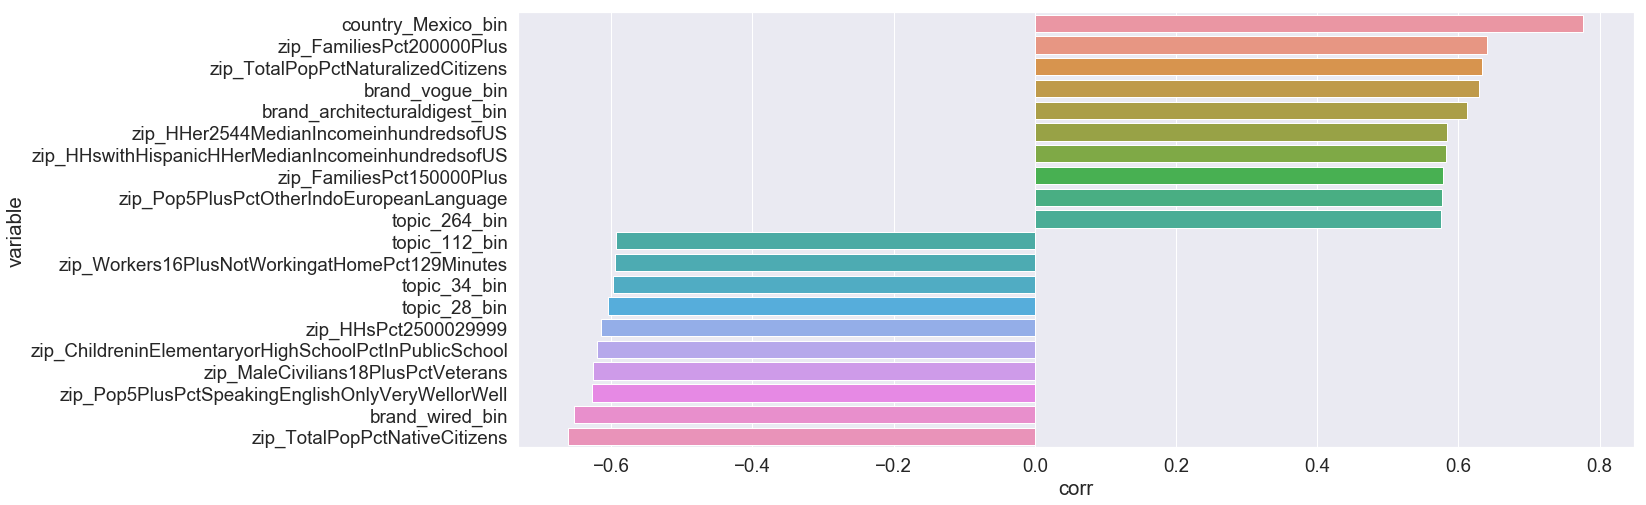

In [84]:
top_20 = pd.concat([corr_model_1.head(10),corr_model_1.tail(10)])
#top_20.to_csv("model_1_var_auc_corr.csv")
plt.figure(figsize=(20, 8))
#plt.xticks(rotation=45)
sns.set(font_scale=1.7)
sns_plot = sns.barplot(x="corr", y="variable", data=top_20)
pic = sns_plot.get_figure()
pic.savefig('model_1_var_auc_corr.png')

#### 4 fashion_luxurymale_model

In [85]:
combine_model_2 = combine_coeff_auc_model(2)
corr_model_2 = combine_model_2.corr()
corr_model_2 = get_corr(corr_model_2)

In [86]:
corr_model_2.head(10)

variable      corr
0                country_Mexico_bin  0.944699
1              days_since_last_seen  0.825580
2                  brand_brides_bin  0.803210
3                      brand_brides  0.746906
4  country_UnitedStates_dma_756_bin  0.695690
5  country_UnitedStates_dma_638_bin  0.677751
6                     topic_139_bin  0.671975
7                     topic_137_bin  0.670228
8                     topic_127_bin  0.667628
9  country_UnitedStates_dma_515_bin  0.632060

In [87]:
corr_model_2 = corr_model_2.iloc[:-9,:]
corr_model_2.tail(10)

variable      corr
1089                            zip_Pop25PlusAverageAge -0.684448
1090                                 zip_HHsAverageSize -0.684582
1091            zip_OccupiedHousingUnitsMedianYearBuilt -0.694587
1092                                      topic_142_bin -0.701168
1093  zip_EmployedCivilianPop16PlusPctInstallationMa... -0.703553
1094                             zip_Pop25PlusMedianAge -0.713397
1095                                 zip_TotalPopPctHHs -0.737586
1096       zip_RenteroccupiedHousingUnitsPctLessThan100 -0.750666
1097                     zip_HousingUnitsPctMobileHomes -0.785827
1098  zip_ChildreninElementaryorHighSchoolPctInPubli... -0.817011

#### Result:
For model fashion_luxurymale_model, the most correlated variable patterns with auc trend.
#### Visualization

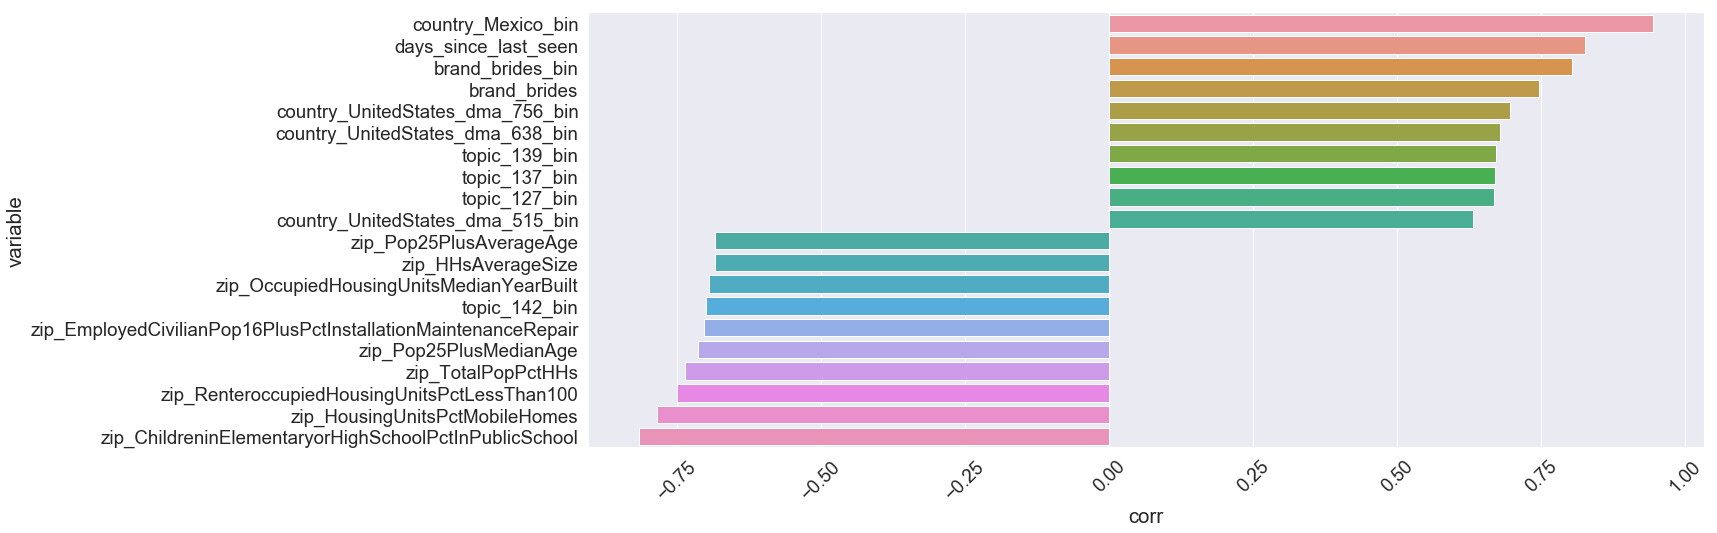

In [88]:
top_20 = pd.concat([corr_model_2.head(10),corr_model_2.tail(10)])
#top_20.to_csv("model_2_var_auc_corr.csv")
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45)
sns.set(font_scale=1.7)
sns_plot = sns.barplot(x="corr", y="variable", data=top_20)
pic = sns_plot.get_figure()
pic.savefig('model_2_var_auc_corr.png')

#### 5 fashion_luxuryretail_model

In [89]:
combine_model_3 = combine_coeff_auc_model(3)
corr_model_3 = combine_model_3.corr()
corr_model_3 = get_corr(corr_model_3)

In [90]:
corr_model_3.head(10)

variable      corr
0                  brand_brides_bin  0.786609
1                     topic_137_bin  0.773490
2                     topic_127_bin  0.729902
3              days_since_last_seen  0.728554
4  country_UnitedStates_dma_638_bin  0.708001
5                      brand_brides  0.696118
6  country_UnitedStates_dma_756_bin  0.672635
7               country_Unknown_bin  0.664196
8  country_UnitedStates_dma_515_bin  0.641515
9                     topic_139_bin  0.630046

In [91]:
corr_model_3 = corr_model_3.iloc[:-12,:]
corr_model_3.tail(10)

variable      corr
1086                               zip_HousingUnitsPct3 -0.665421
1087                                      topic_243_bin -0.667292
1088                                zip_TotalPopPctMale -0.672713
1089              zip_HousingUnitsPctDetachedSingleunit -0.693929
1090  zip_EmployedCivilianPop16PlusPctConstructionEx... -0.698128
1091                 zip_HHsPctWithSocialSecurityIncome -0.715153
1092       zip_RenteroccupiedHousingUnitsPctLessThan100 -0.748361
1093                            zip_Pop25PlusAverageAge -0.749722
1094                             zip_Pop25PlusMedianAge -0.820916
1095  zip_ChildreninElementaryorHighSchoolPctInPubli... -0.880913

#### Result:
Result: For model fashion_luxuryretail_model, the most correlated variable patterns with auc trend.
#### Visualization

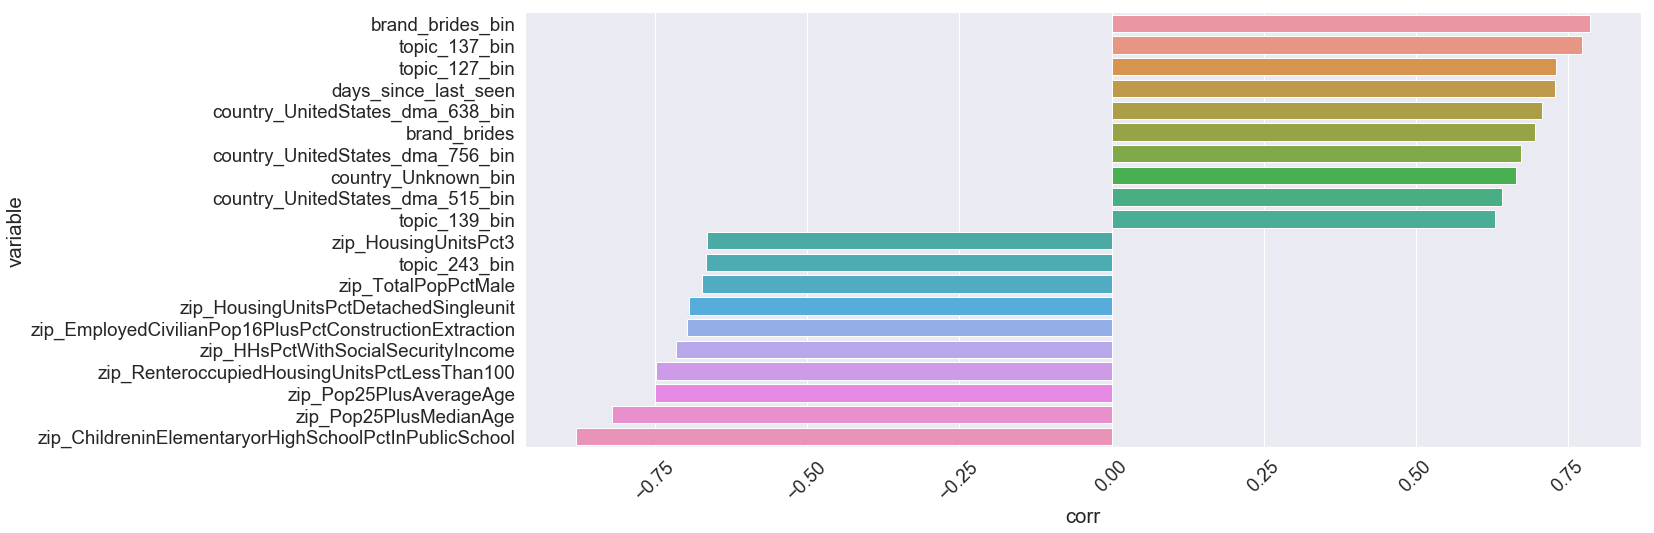

In [92]:
top_20 = pd.concat([corr_model_3.head(10),corr_model_3.tail(10)])
#top_20.to_csv("model_3_var_auc_corr.csv")
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45)
sns.set(font_scale=1.7)
sns_plot = sns.barplot(x="corr", y="variable", data=top_20)
pic = sns_plot.get_figure()
pic.savefig('model_3_var_auc_corr.png')

#### 6 fashion_luxurywatch_model

In [93]:
combine_model_4 = combine_coeff_auc_model(4)
corr_model_4 = combine_model_4.corr()
corr_model_4 = get_corr(corr_model_4)

In [94]:
corr_model_4.head(10)

variable      corr
0                  brand_brides_bin  0.833419
1                     topic_290_bin  0.803415
2                      brand_brides  0.796665
3                     topic_137_bin  0.772724
4  country_UnitedStates_dma_638_bin  0.731516
5  country_UnitedStates_dma_756_bin  0.726193
6                     topic_139_bin  0.725919
7                     topic_127_bin  0.716295
8              days_since_last_seen  0.657487
9               country_Unknown_bin  0.600784

In [95]:
corr_model_4 = corr_model_4.iloc[:-25,:]
corr_model_4.tail(10)

variable      corr
1073                               platform_desktop_bin -0.651371
1074                    zip_HousingUnitsMedianYearBuilt -0.664190
1075            zip_OccupiedHousingUnitsMedianYearBuilt -0.683831
1076                             zip_Pop25PlusMedianAge -0.697844
1077  zip_EmployedCivilianPop16PlusPctPrivateCompany... -0.726648
1078                            zip_Pop25PlusAverageAge -0.742080
1079   zip_Pop5PlusPctSpeakingEnglishOnlyVeryWellorWell -0.773914
1080                                      topic_243_bin -0.780976
1081  zip_ChildreninElementaryorHighSchoolPctInPubli... -0.788553
1082                                zip_TotalPopPctMale -0.840622

#### Result:
Result: For model fashion_luxurywatch_model, the most correlated variable patterns with auc trend.
#### Visualization

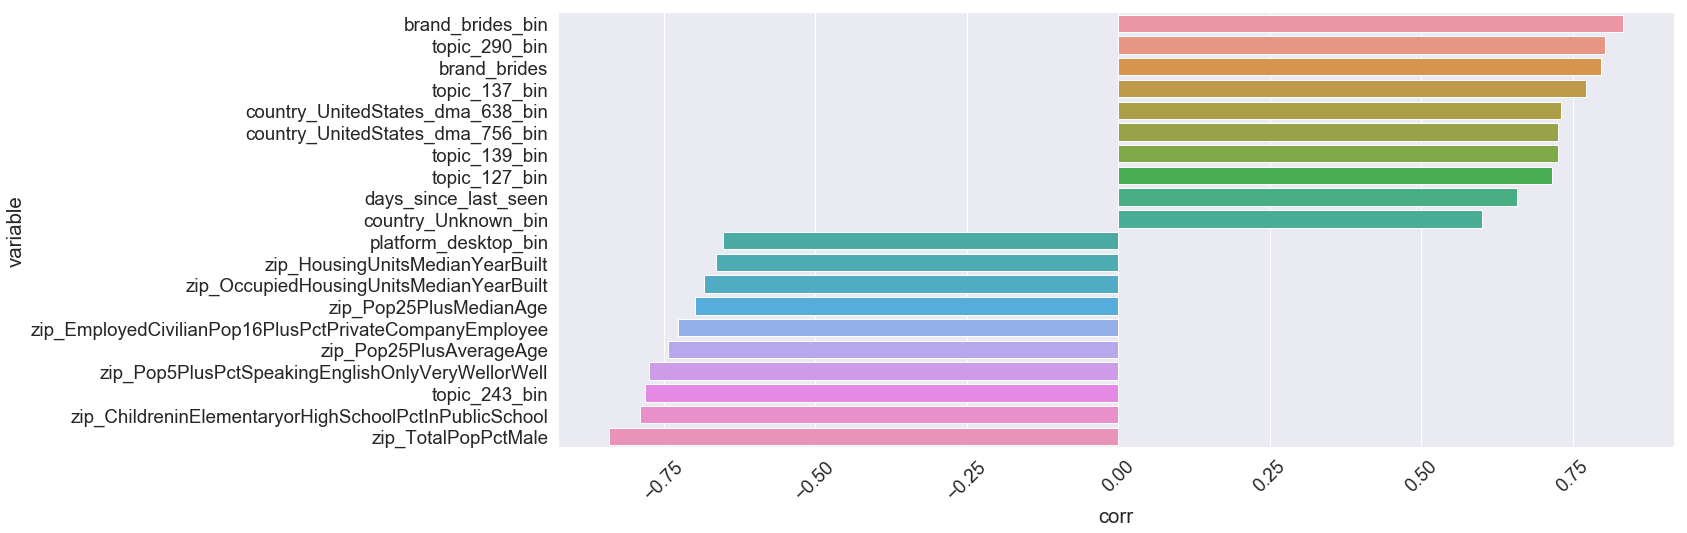

In [96]:
top_20 = pd.concat([corr_model_4.head(10),corr_model_4.tail(10)])
#top_20.to_csv("model_4_var_auc_corr.csv")
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45)
sns.set(font_scale=1.7)
sns_plot = sns.barplot(x="corr", y="variable", data=top_20)
pic = sns_plot.get_figure()
pic.savefig('model_4_var_auc_corr.png')

### 2.4.4 Visulizations of certain coefficient and auc change over time.

Text(0.5, 1.0, 'auc of luxury jewelry model change over time')

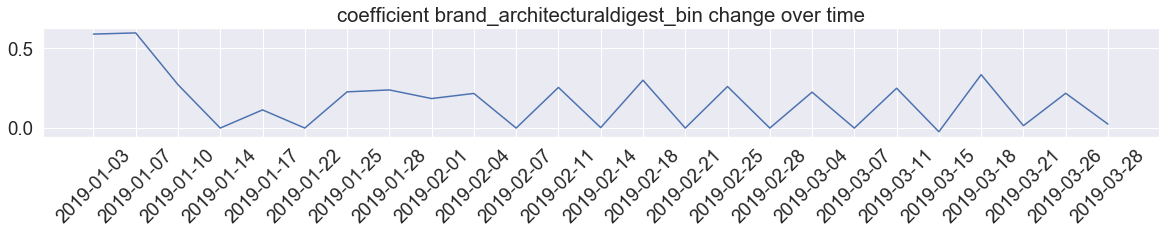

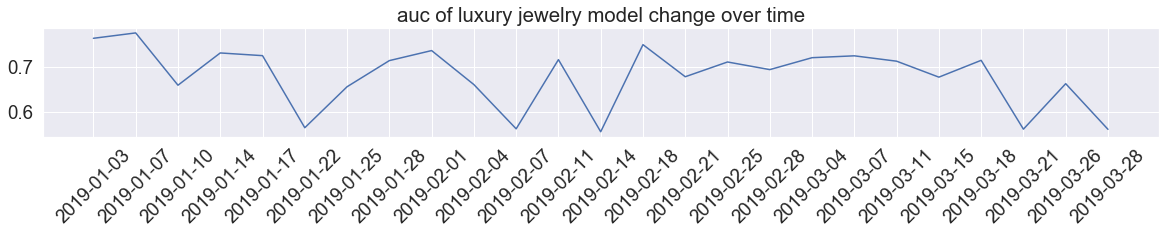

In [97]:
var_auc = corr_variable_auc(model_auc_list[1],model_coeff_list[1],'brand_architecturaldigest_bin')

plt.figure(figsize=(20, 2))
plt.plot(var_auc.iloc[:,0],var_auc.iloc[:,2])
plt.xticks(rotation=45)
plt.title('coefficient brand_architecturaldigest_bin change over time') 

plt.figure(figsize=(20, 2))
plt.plot(var_auc.iloc[:,0],var_auc.iloc[:,3])
plt.xticks(rotation=45)
plt.title('auc of luxury jewelry model change over time') 

## 2.5 Correlation between variable trends.

In [98]:
def get_corr_model(n):
    sub = coeff.loc[:,["Date","variable",model_coeff_list[n]]]
    var_name = sub.variable.unique().tolist()
    var_name.sort()
    all_var = pd.pivot_table(sub,index = ['Date'],columns=['variable'])
    all_var = pd.DataFrame(all_var.to_records())
    var_name.insert(0,"Date")   
    all_var.columns = var_name
    corr = all_var.corr()
    return corr

In [99]:
def get_heatmap(df,threashold = 0.9999):
    corr_count = df > threashold
    index = []
    for i in range(df.shape[1]):
        if corr_count.iloc[:,i].sum() >1:
            index.append(i)
            #print(i,":",corr_count.iloc[:,i].sum())
    print(len(index))
    corr_sub = df.iloc[index,index]
    #for i in index_2:
    #    print(corr_2.loc[corr_2.iloc[:,i] > 0.9999,corr_2.columns[i]],'\n')
    # plot the heatmap
    plt.subplots(figsize = (20,15))
    sns.heatmap(corr_sub, annot = True, annot_kws={'size':9},cmap = sns.cubehelix_palette(as_cmap = True),linecolor='white',
    linewidths=0.1,xticklabels=corr_sub.columns,yticklabels=corr_sub.columns)

30


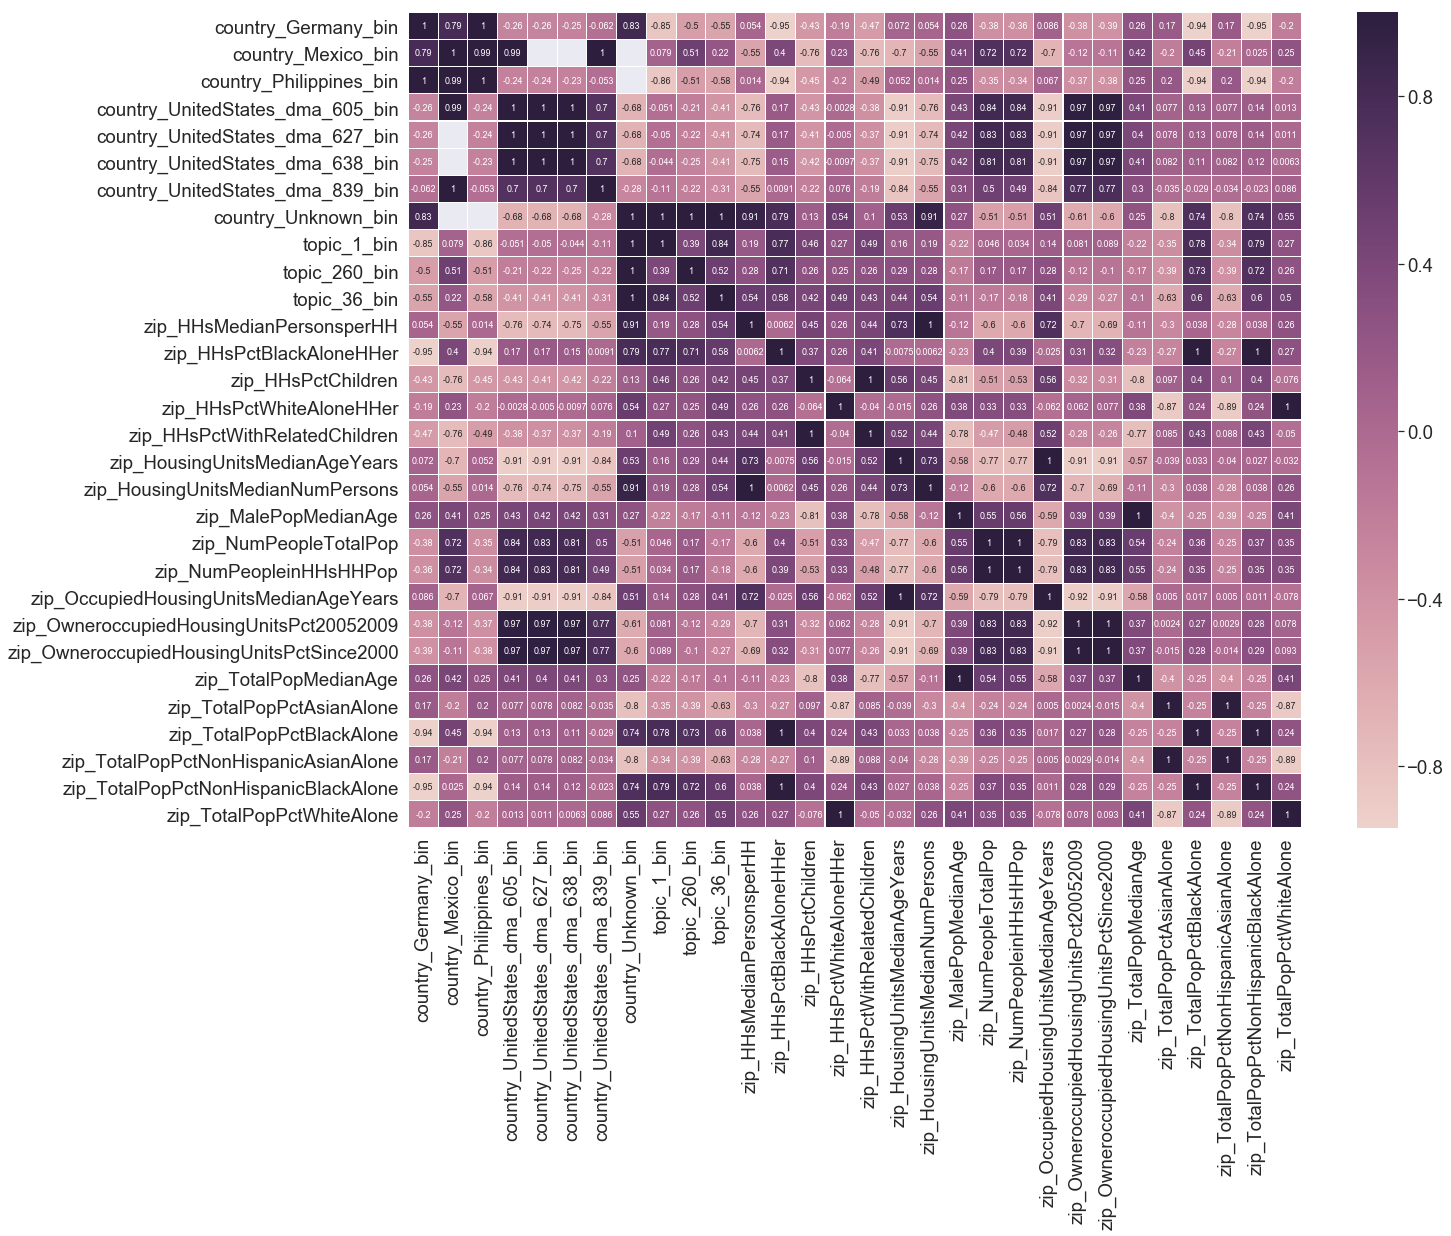

In [100]:
corr_0 = get_corr_model(0)
get_heatmap(corr_0,0.997)

24


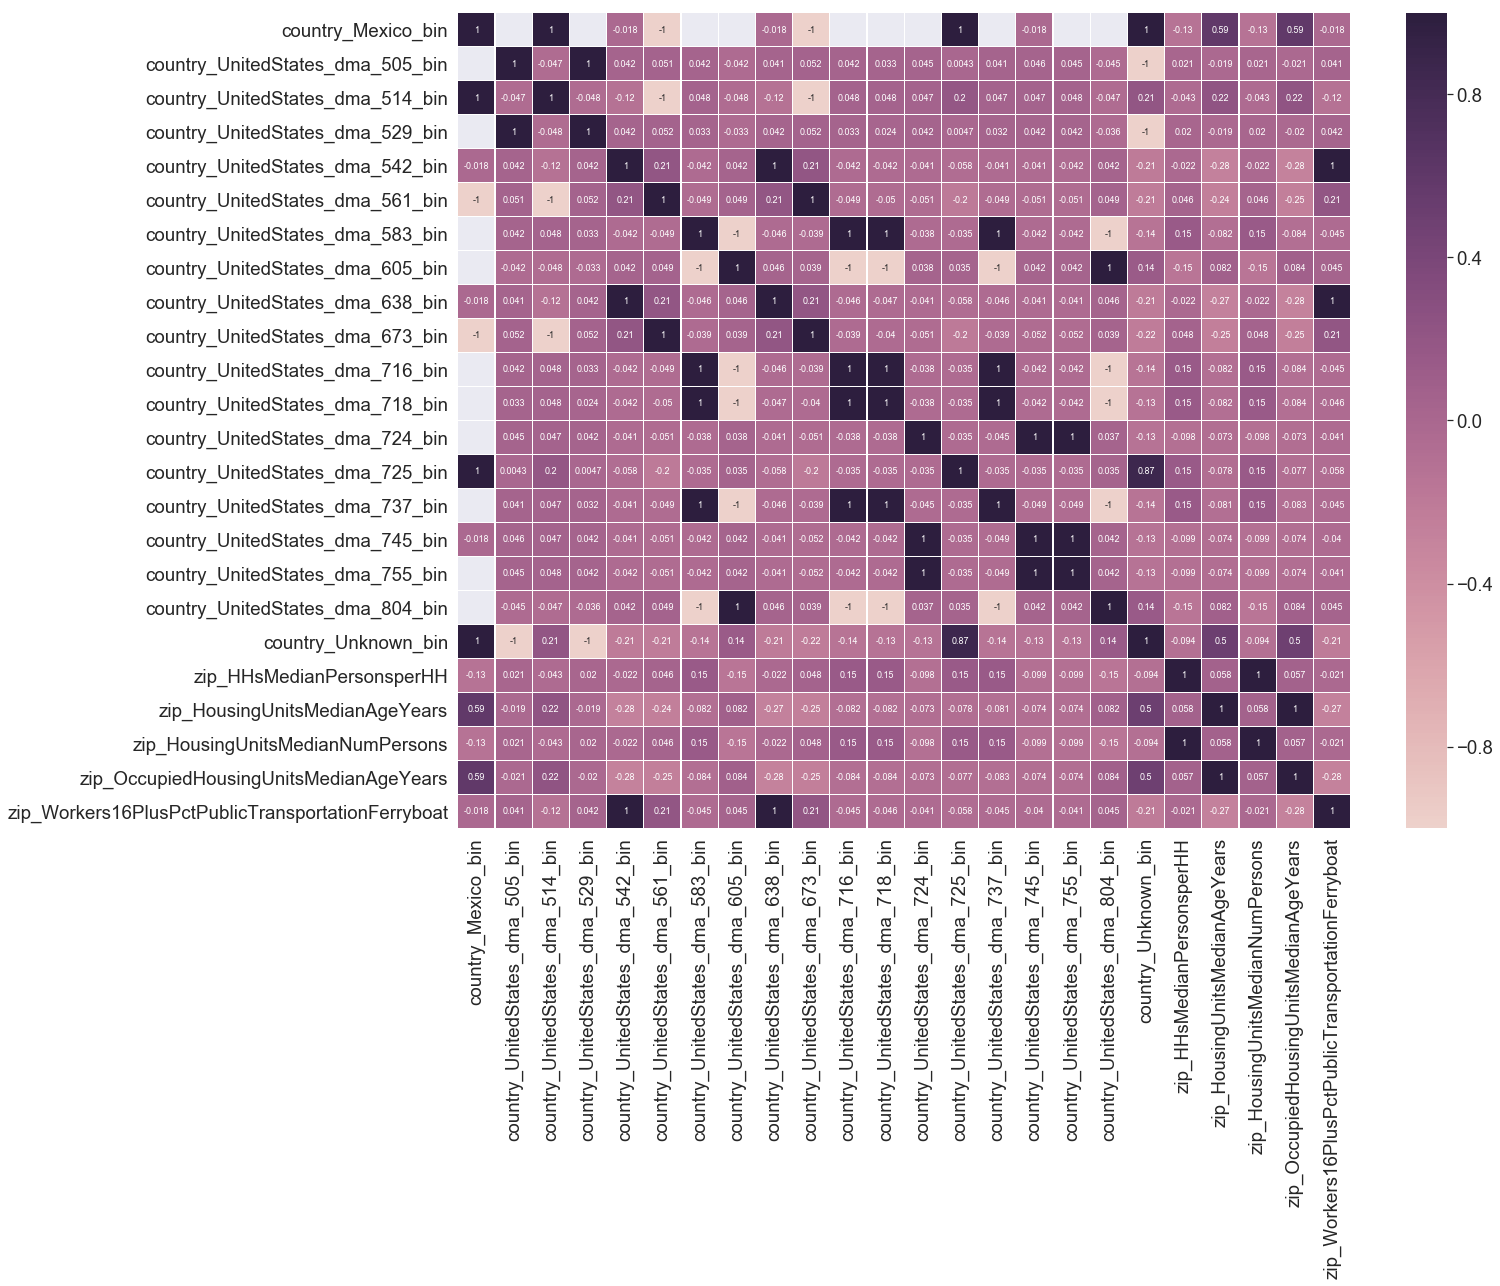

In [101]:
corr_1 = get_corr_model(1)
get_heatmap(corr_1)

26


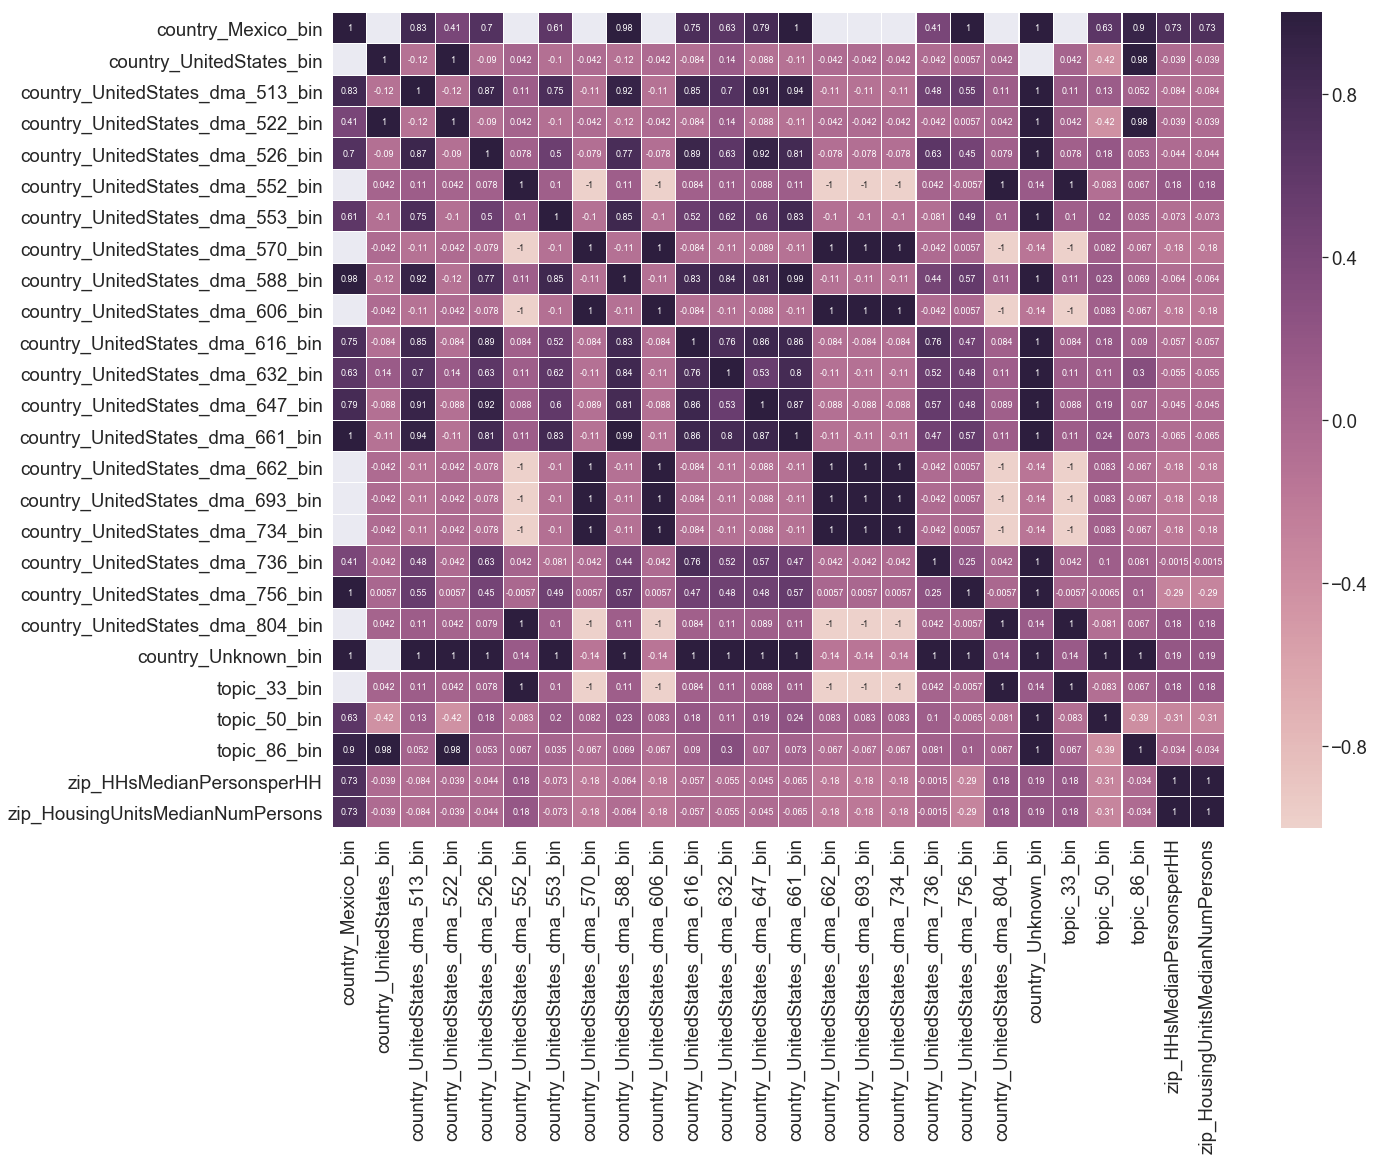

In [102]:
corr_2 = get_corr_model(2)
get_heatmap(corr_2)

24


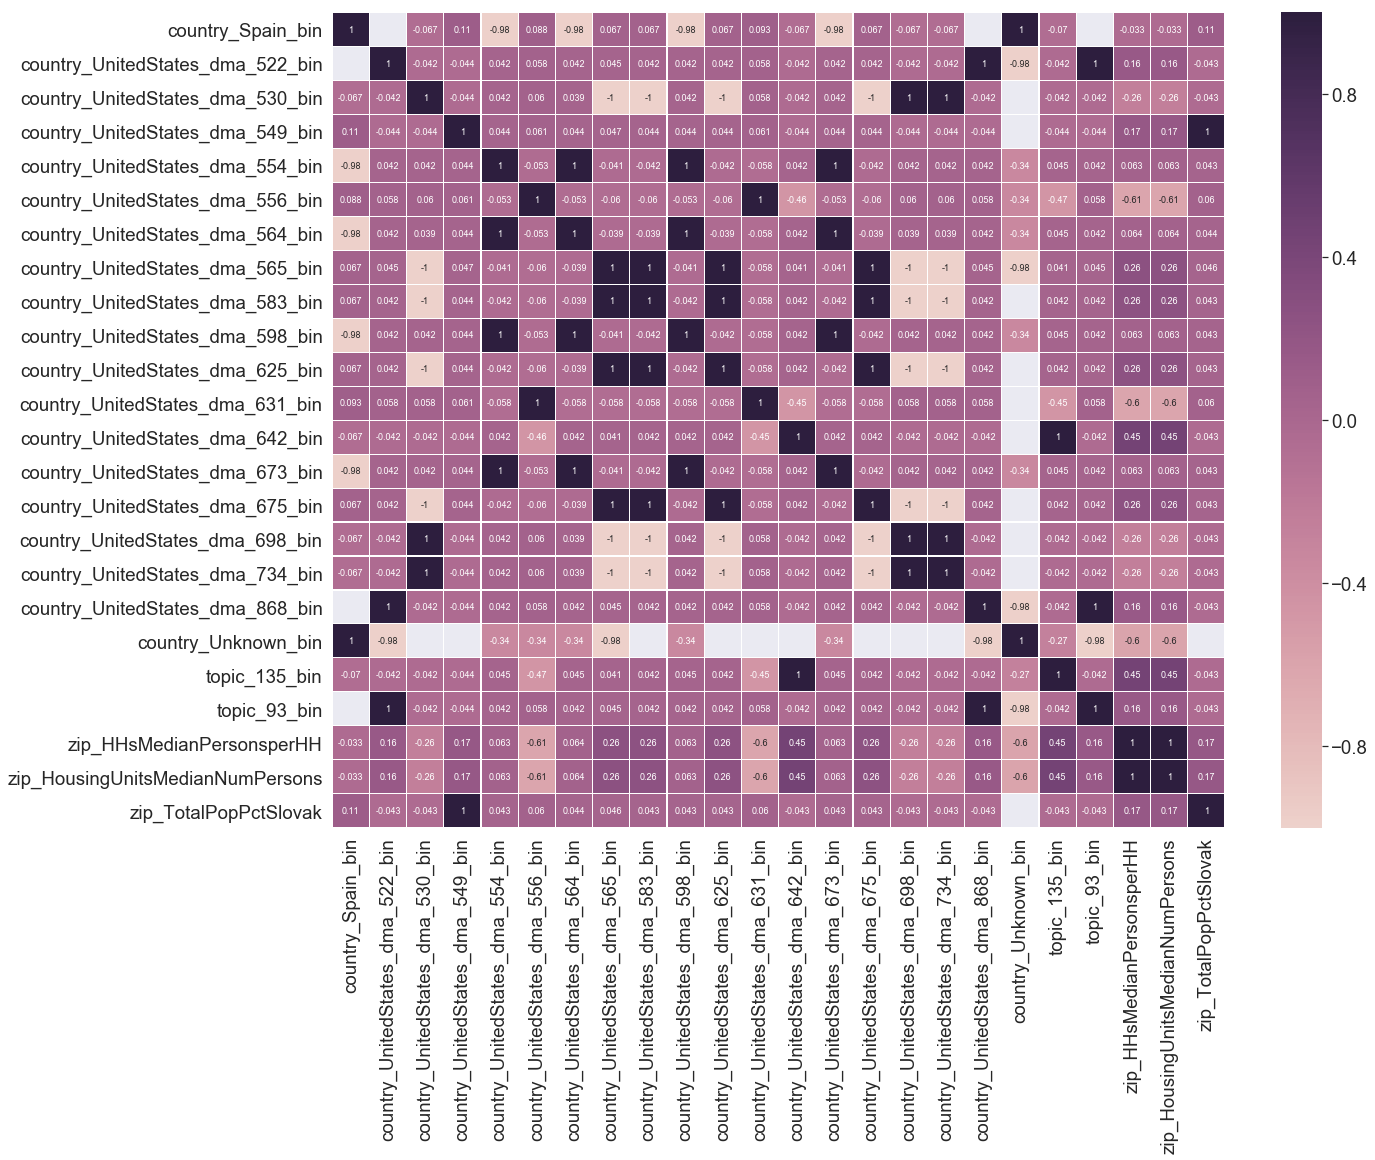

In [103]:
corr_3 = get_corr_model(3)
get_heatmap(corr_3,0.9999)

16


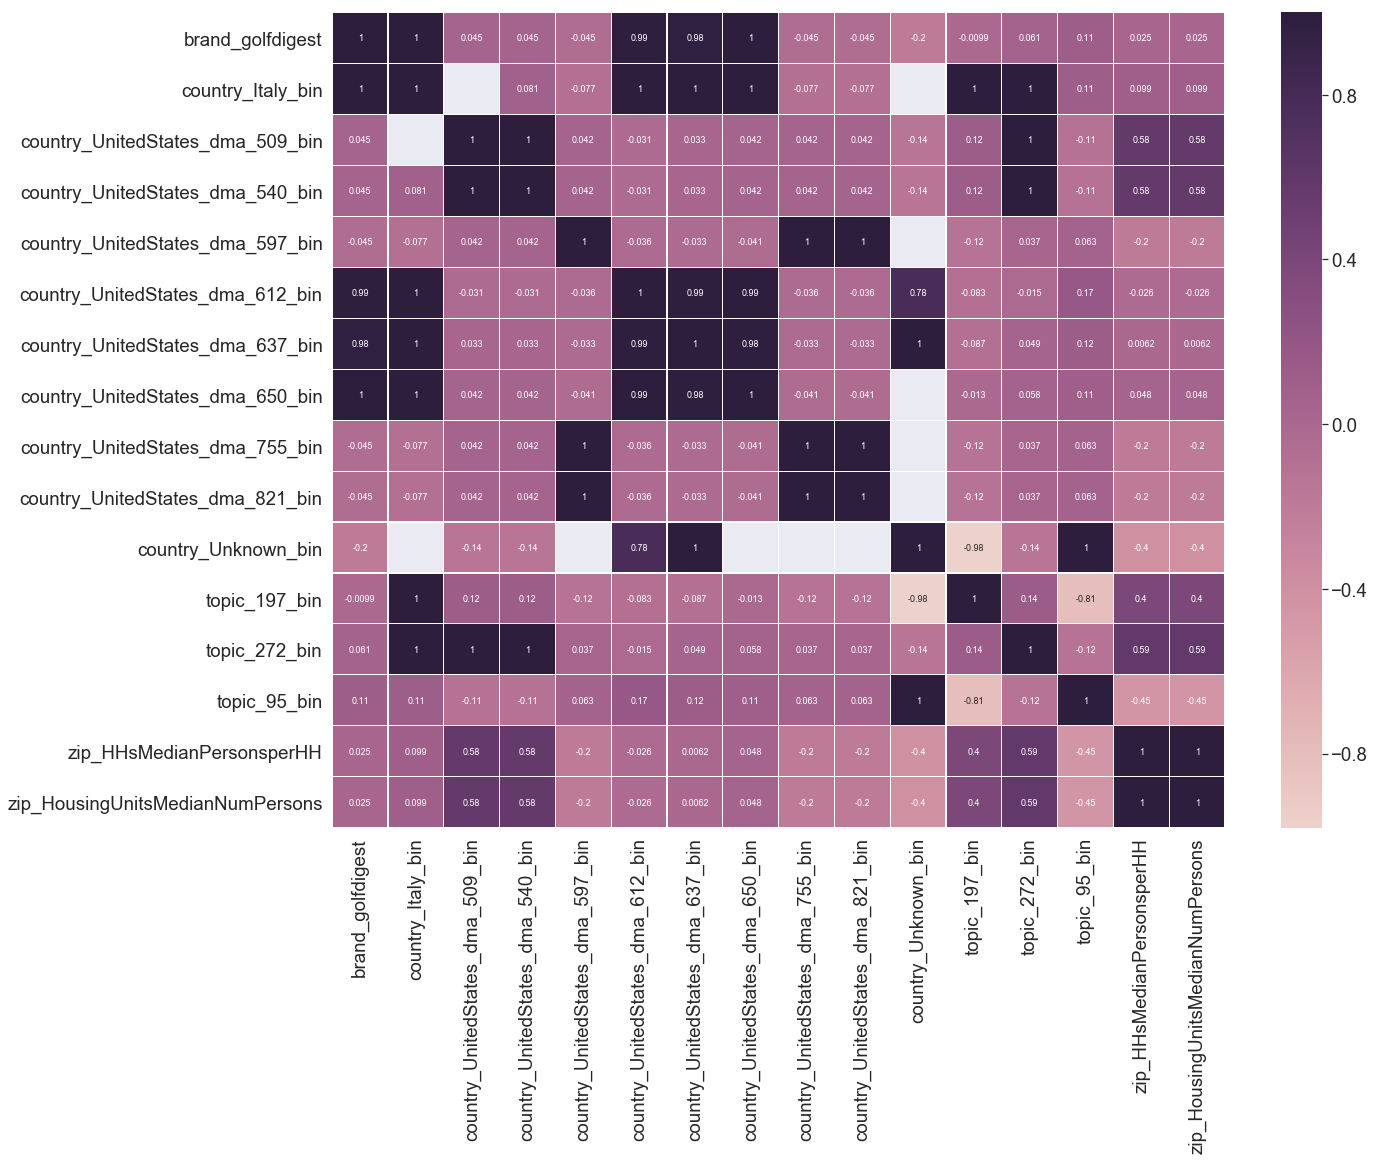

In [104]:
corr_4 = get_corr_model(4)
get_heatmap(corr_4,0.9999993)

#### Result:
There are many highly correlated variable trends.
### Check correlation between auc change

In [105]:
auc_sub_2 = auc.loc[auc.model == 'best model on full dataset',:]
auc_sub_2 = auc_sub_2.sort_values(by = ["Date"])
auc_sub_2.shape

(25, 7)

In [106]:
auc_corr = auc_sub_2.corr()

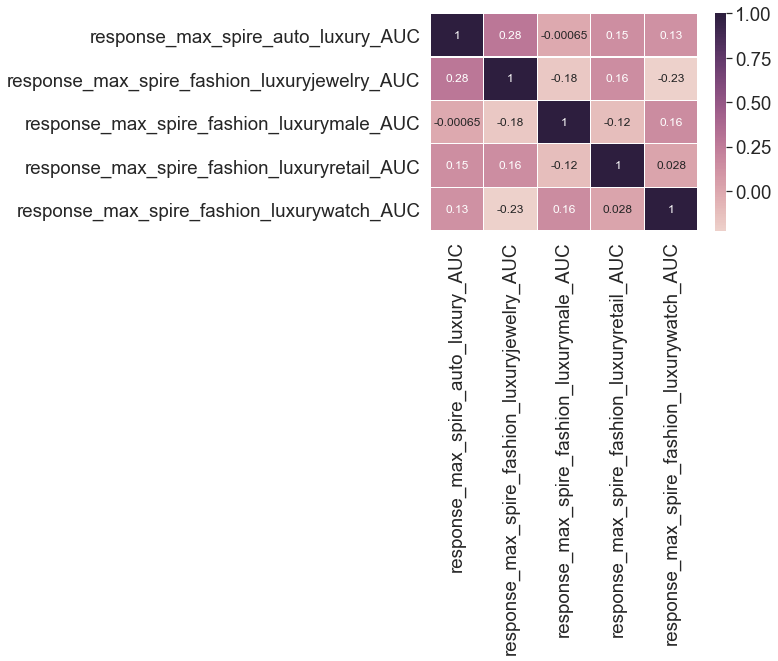

In [107]:
#plt.subplots(figsize = (10,15))
sns.heatmap(auc_corr, annot = True, annot_kws={'size':12},cmap = sns.cubehelix_palette(as_cmap = True),linecolor='white',
linewidths=0.1,xticklabels=auc_corr.columns,yticklabels=auc_corr.columns)

#### Result:
Auc patterns are not highly correlated.